<a href="https://colab.research.google.com/github/Shalinivijayravikumar/shalinivijayravikumar.github.io/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This dataset contains synthetic data simulating customer behavior for a Netflix-like video streaming service. It includes 5,000 records with 14 carefully engineered features designed for churn prediction modeling, business insights, and customer segmentation.

The dataset is ideal for:

Machine learning classification tasks (churn vs. non-churn)

Exploratory data analysis (EDA)

Customer behavior modeling in OTT platforms

# 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).¶

### Import libraries and load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

In [2]:
os.getcwd()

'/content'

In [3]:
print("Current directory:", os.getcwd())

Current directory: /content


In [4]:
os.chdir('/content')

In [5]:
os.getcwd()

'/content'

In [6]:
from google.colab import files
uploaded = files.upload()

Saving netflix_customer_churn.csv to netflix_customer_churn.csv


In [7]:
import pandas as pd
df = pd.read_csv("netflix_customer_churn.csv")

### LOAD THE DATA

In [8]:
df=pd.read_csv("netflix_customer_churn.csv")

### Checking the data

In [9]:
df.tail()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
4995,44f3ba44-b95d-4e50-a786-bac4d06f4a43,19,Female,Basic,49.17,11,Europe,Desktop,8.99,0,Credit Card,4,4.10,Drama
4996,18779bcb-ba2b-41da-b751-e70b812061ec,67,Female,Basic,9.24,2,North America,Desktop,8.99,0,PayPal,3,3.08,Documentary
4997,3f32e8c5-615b-4a3b-a864-db2688f7834f,66,Male,Standard,16.55,49,South America,Desktop,13.99,1,Debit Card,2,0.33,Action
4998,7b0ad82d-6571-430e-90f4-906259e0e89c,59,Female,Basic,9.12,3,Europe,Laptop,8.99,0,Credit Card,4,2.28,Sci-Fi
4999,82aeef39-ddb0-40ad-bae1-5c436e0cf042,57,Male,Basic,1.62,17,Africa,Mobile,8.99,1,Crypto,2,0.09,Action


In [10]:
df.describe()

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.847400,11.649450,30.089800,13.683400,0.503000,3.024400,0.874800
std,15.501128,12.014654,17.536078,3.692062,0.500041,1.415841,2.619824
min,18.000000,0.010000,0.000000,8.990000,0.000000,1.000000,0.000000
25%,30.000000,3.337500,15.000000,8.990000,0.000000,2.000000,0.110000
50%,44.000000,8.000000,30.000000,13.990000,1.000000,3.000000,0.290000
75%,58.000000,16.030000,45.000000,17.990000,1.000000,4.000000,0.720000
max,70.000000,110.400000,60.000000,17.990000,1.000000,5.000000,98.420000


The average user age is about 44 years, with most users between 30 (Q1) and 58 (Q3).

Churned is roughly balanced, with about half the users having churned (mean = 0.503).

The monthly fee ranges from $9 to $18.

Average watch_hours is 11.65, but the high standard deviation (12.02) and the maximum (110.4) indicate some users watch much more than most.

The average number of profiles per account is about 3.

Many users have relatively low avg_watch_time_per_day (median 0.29 hours, but some report very high values, up to 98.42 hours, possibly due to data errors or outliers).

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

The data frame has 5000 rows and 14 columns,not having any missing values.

In [12]:
df.shape

(5000, 14)

In [13]:
df.nunique()

,0
customer_id,5000
age,53
gender,3
subscription_type,3
watch_hours,2343
last_login_days,61
region,6
device,5
monthly_fee,3
churned,2


The data frame has so many unique values in the  'Watch_hours' and 'avg_watch_time_per_day' columns.

In [14]:
categorical_cols = ['gender', 'subscription_type', 'region', 'device', 'payment_method', 'favorite_genre']

for col in categorical_cols:
    print(f"{col} unique values: {df[col].unique()}")

gender unique values: ['Other' 'Female' 'Male']
subscription_type unique values: ['Basic' 'Standard' 'Premium']
region unique values: ['Africa' 'Europe' 'Asia' 'Oceania' 'South America' 'North America']
device unique values: ['TV' 'Mobile' 'Laptop' 'Desktop' 'Tablet']
payment_method unique values: ['Gift Card' 'Crypto' 'Debit Card' 'PayPal' 'Credit Card']
favorite_genre unique values: ['Action' 'Sci-Fi' 'Drama' 'Horror' 'Romance' 'Comedy' 'Documentary']


In [15]:
df.dtypes

,0
customer_id,object
age,int64
gender,object
subscription_type,object
watch_hours,float64
last_login_days,int64
region,object
device,object
monthly_fee,float64
churned,int64


In [16]:
df.isnull().sum()

,0
customer_id,0
age,0
gender,0
subscription_type,0
watch_hours,0
last_login_days,0
region,0
device,0
monthly_fee,0
churned,0


This data has no null values.

# checking duplicates

In [17]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
4995,False
4996,False
4997,False
4998,False


this dataset has no duplicate

In [18]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]


Number of duplicate rows = 0


,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre


In this data frame has some unwanted column those are  "customer_id".so i dropping this column.

In [19]:
df = df.drop('customer_id', axis=1)

In [20]:
print(df.columns.tolist())

['age', 'gender', 'subscription_type', 'watch_hours', 'last_login_days', 'region', 'device', 'monthly_fee', 'churned', 'payment_method', 'number_of_profiles', 'avg_watch_time_per_day', 'favorite_genre']


# UNIVARIATE ANALYSIS FOR CONTINIOUS COLUMN AND CATEGORICAL COLUMN



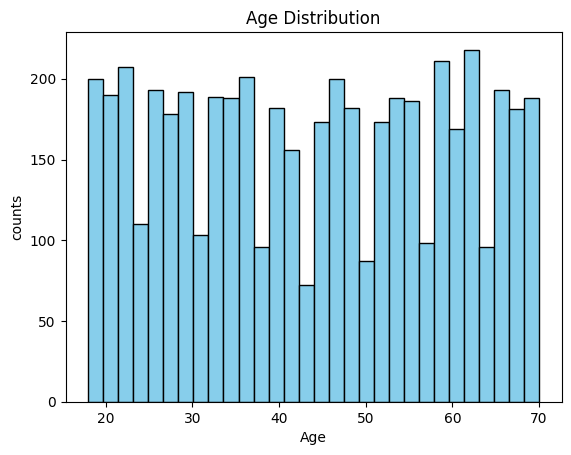

In [21]:
import matplotlib.pyplot as plt
plt.hist(df['age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('counts')
plt.show()

The age distribution of Netflix viewers in this dataset fluctuates across all ages.

While some ages above 60 have relatively high user counts, users are spread throughout all age ranges, and there is no single group that dominates.

The 'age' variable shows some unpredictable highs and lows, which means the distribution is uneven, not concentrated only among the very old or very young.

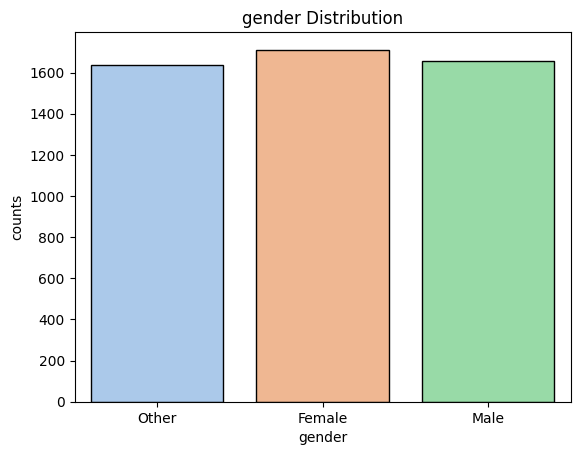

In [22]:
import matplotlib.pyplot as plt
sns.countplot(x='gender', data=df, palette='pastel', edgecolor='black')
plt.title('gender Distribution')
plt.xlabel('gender')
plt.ylabel('counts')
plt.show()

The dataset is fairly evenly distributed across genders, with all three groups having counts at a similar scale.

The Female category has the highest count, indicating that there are slightly more females in the dataset than males or others.

The Male category follows closely behind, with a count nearly equal to females.

The 'Other' category has the smallest count, but it's still a good number. This shows that some people identify as something other than male or female.

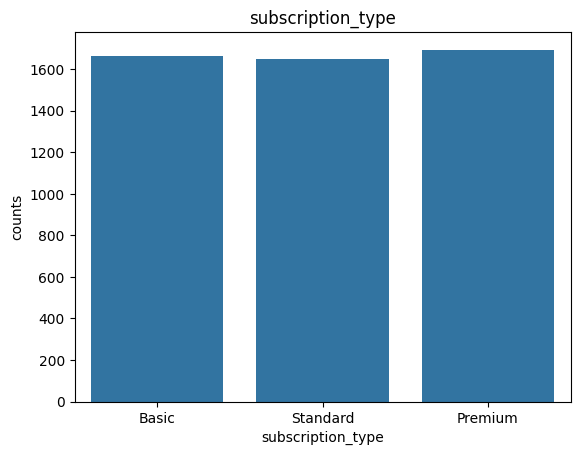

In [23]:
import matplotlib.pyplot as plt
sns.countplot(x='subscription_type', data=df)
plt.title('subscription_type')
plt.xlabel('subscription_type')
plt.ylabel('counts')
plt.show()

All three subscription types (Basic, Standard, Premium) have a similar number of users, each with a count slightly above 1,600.

No subscription type is overwhelmingly more popular than the others. This suggests the service appeals to a broad range of preferences or budgets.

The even spread could indicate that pricing and feature differentiation between plans are well-balanced, attracting different user segments evenly.

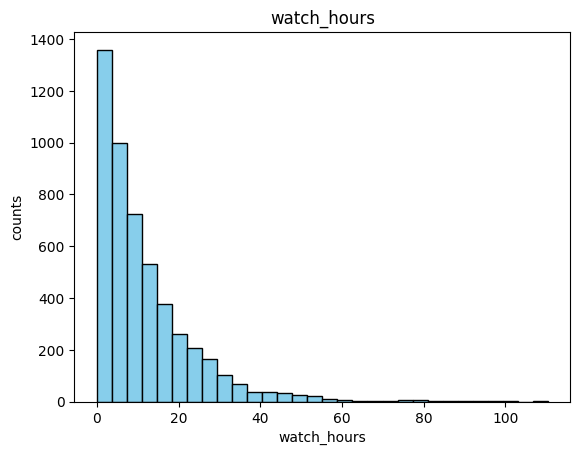

In [24]:
import matplotlib.pyplot as plt
plt.hist(df['watch_hours'], bins=30, color='skyblue', edgecolor='black')
plt.title('watch_hours')
plt.xlabel('watch_hours')
plt.ylabel('counts')
plt.show()

The distribution goes from many people with low watch hours to very few with high watch hours.

The plot is "right-skewed," meaning most values are on the left (low), with a long tail stretching rightward to higher numbers.

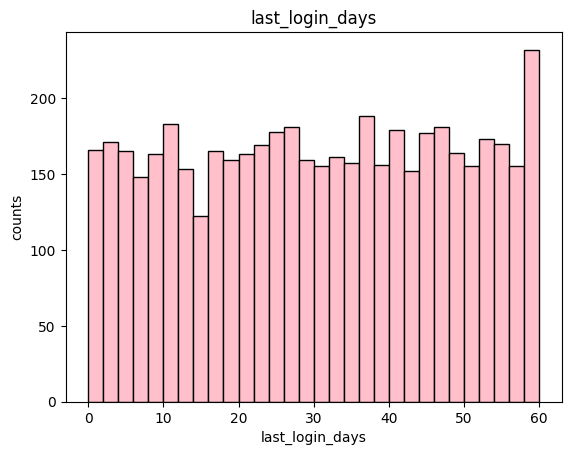

In [25]:
import matplotlib.pyplot as plt
plt.hist(df['last_login_days'], bins=30, color='pink', edgecolor='black')
plt.title('last_login_days')
plt.xlabel('last_login_days')
plt.ylabel('counts')
plt.show()


In the last_login_days column, the distribution fluctuates across the days, indicating that users' last login days are spread fairly evenly over 60 days. Some users last logged in 60 days ago, which could suggest inactivity or possible churn, meaning they might have canceled the service.

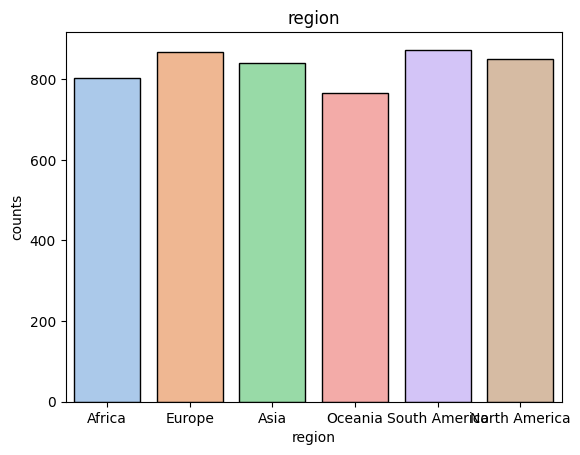

In [26]:
import matplotlib.pyplot as plt
sns.countplot(x='region', data=df, palette='pastel', edgecolor='black')
plt.title('region')
plt.xlabel('region')
plt.ylabel('counts')
plt.show()


The dataset has a high number of viewers from South America, followed by Europe and North America, indicating that most viewers are from South America compared to other regions.

Europe and South America have the highest counts, closely followed by North America and Asia.

Oceania has a little fewer people than the other regions, but the difference isn’t big. Africa’s number is also close to the others.

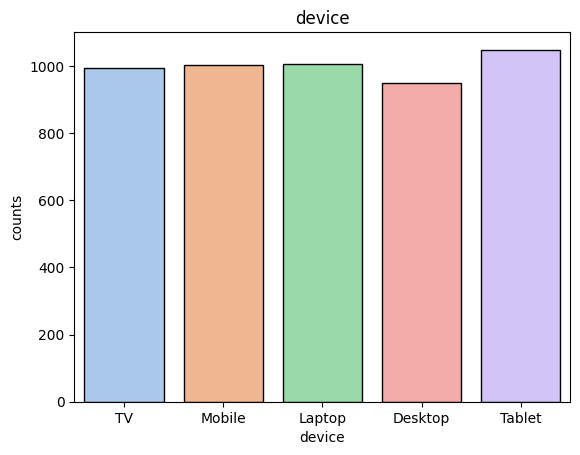

In [27]:
import matplotlib.pyplot as plt
sns.countplot(x='device', data=df, palette='pastel', edgecolor='black')
plt.title('device')
plt.xlabel('device')
plt.ylabel('counts')
plt.show()


In the device column, tablets have the highest number of users compared to other devices. TV, mobile, and laptop have similar counts, closely following tablets. Desktops have the lowest count, indicating that fewer users watch the service on a desktop. Overall, tablet appear to be the most commonly used device among users.

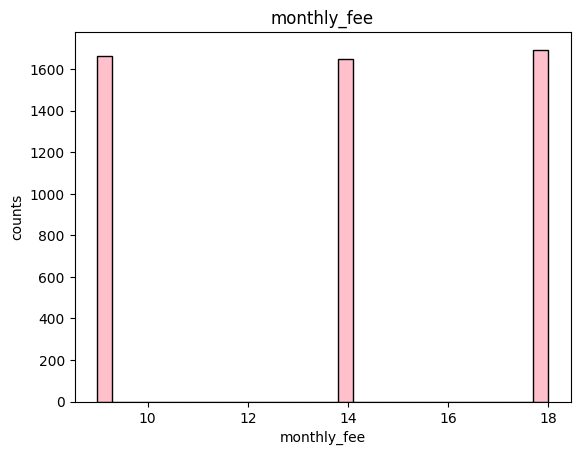

In [28]:
import matplotlib.pyplot as plt
plt.hist(df['monthly_fee'], bins=30, color='pink', edgecolor='black')
plt.title('monthly_fee')
plt.xlabel('monthly_fee')
plt.ylabel('counts')
plt.show()


In the monthly_fee column, the bar heights increase at values below 10, exactly 14, and 18. This indicates that the data is not evenly spread,with more users paying around 9, 14, and 18. A larger number of users pay less than 18 per month, with many paying exactly 18.

Each bar is about the same height, showing around 1,650 users for each fee level. This means the users are almost evenly spread across the three subscription prices.



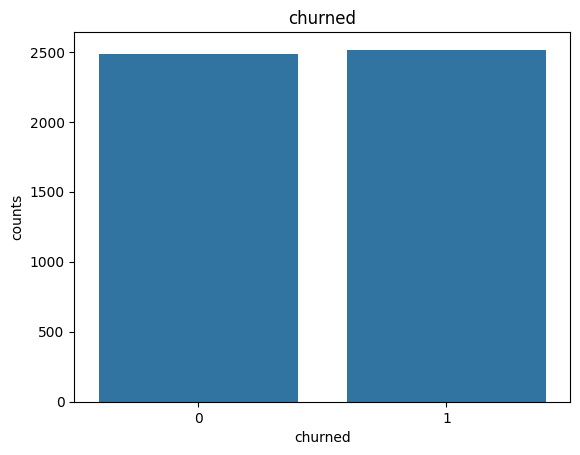

In [29]:
import matplotlib.pyplot as plt
sns.countplot(x='churned', data=df)
plt.title('churned')
plt.xlabel('churned')
plt.ylabel('counts')
plt.show()


In the churned dataset, there isn’t much difference between the 'churned' and 'not churned' categories. The bars are almost the identical, showing that the data is fairly evenly split.

There is no major imbalance between users who churned and those who remained.

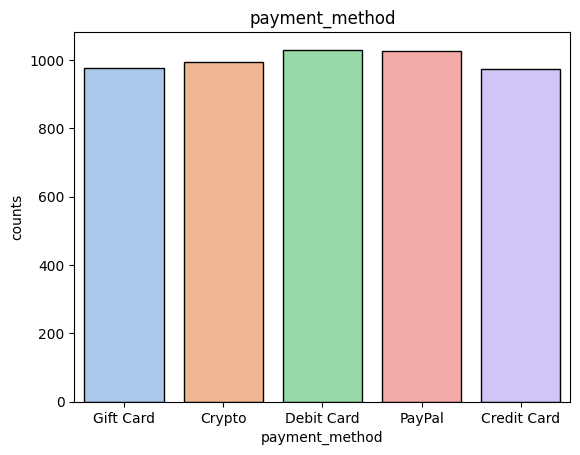

In [30]:
import matplotlib.pyplot as plt
sns.countplot(x='payment_method', data=df, palette='pastel', edgecolor='black')
plt.title('payment_method')
plt.xlabel('payment_method')
plt.ylabel('counts')
plt.show()


These bars show a high number of users using debit cards and PayPal compared to other payment methods, indicating that most users pay the monthly fee through debit cards or PayPal. The bar heights for credit cards and crypto are almost the same and follow closely behind, showing that some users prefer those methods. Gift cards have the lowest count, meaning only a few people use them. In conclusion, the majority of users pay the monthly fee using debit cards and PayPal.







The balanced distribution implies users are nearly equally comfortable with all offered payment methods.

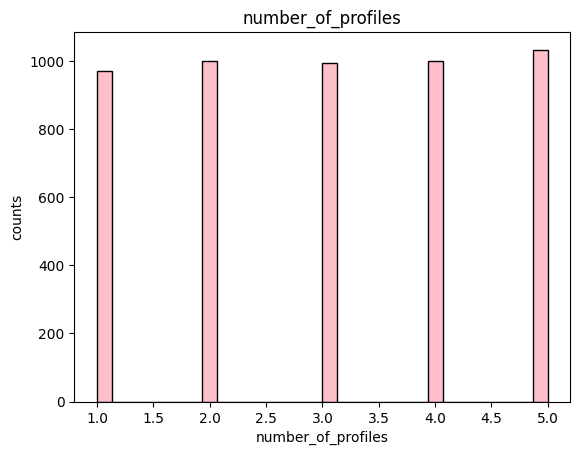

In [31]:
import matplotlib.pyplot as plt
plt.hist(df['number_of_profiles'], bins=30, color='pink', edgecolor='black')
plt.title('number_of_profiles')
plt.xlabel('number_of_profiles')
plt.ylabel('counts')
plt.show()


The number of profiles per account is nearly identical, and the data is fairly evenly spread. This indicates that users have a similar number of profiles per account. However, most people have 5 profiles, while some have only 1, which is the lowest count compared to the others.

No single number of profiles dominates the user base, and there are no major outliers. This suggests users are equally likely to set up any number of profiles within the available range.

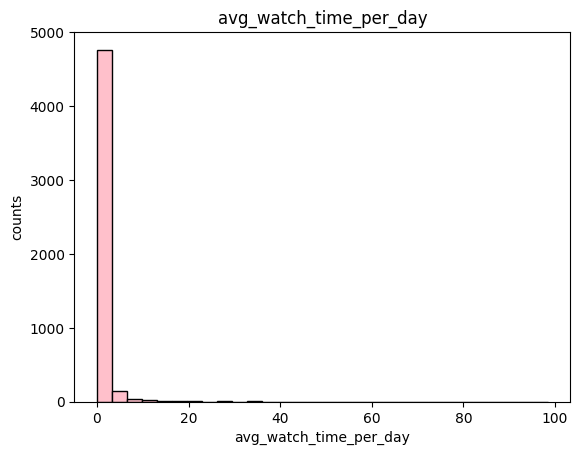

In [32]:
import matplotlib.pyplot as plt
plt.hist(df['avg_watch_time_per_day'], bins=30, color='pink', edgecolor='black')
plt.title('avg_watch_time_per_day')
plt.xlabel('avg_watch_time_per_day')
plt.ylabel('counts')
plt.show()


The avg_watch_time_per_day column shows that the bar counts are not equally spread. The number of users with the lowest average watch time per day is the smallest, which is not a good sign.

Most users watch for very little time each day, close to 0 hours. The first bar is much taller than the others because of this.

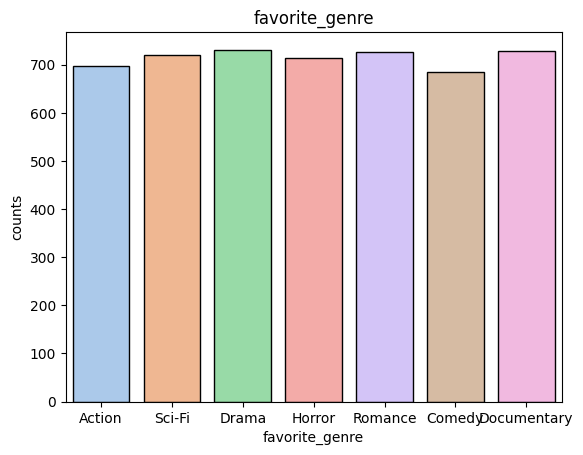

In [33]:
import matplotlib.pyplot as plt
sns.countplot(x='favorite_genre', data=df, palette='pastel', edgecolor='black')
plt.title('favorite_genre')
plt.xlabel('favorite_genre')
plt.ylabel('counts')
plt.show()


In the favorite_genre data, the distribution is even and nearly identical. Users are watching an equal number of favorite genres, with no genre dominating the bar heights.

The bars are almost the same height, showing that people like many different genres—Action, Sci-Fi, Drama, Horror, Romance, Comedy, and Documentary—almost equally.

In [34]:
print(df[['age', 'gender', 'subscription_type', 'watch_hours', 'last_login_days', 'region', 'device', 'monthly_fee', 'churned', 'payment_method', 'number_of_profiles', 'avg_watch_time_per_day', 'favorite_genre']].value_counts().sort_index())

age  gender  subscription_type  watch_hours  last_login_days  region         device  monthly_fee  churned  payment_method  number_of_profiles  avg_watch_time_per_day  favorite_genre
18   Female  Basic              0.33         28               Oceania        Tablet  8.99         1        PayPal          3                   0.01                    Action            1
                                0.75         11               Africa         Laptop  8.99         1        Crypto          5                   0.06                    Romance           1
                                1.82         46               South America  Tablet  8.99         1        Credit Card     3                   0.04                    Romance           1
                                1.97         46               South America  TV      8.99         1        Crypto          2                   0.04                    Action            1
                                3.19         16               North Am

# BIVARIATE ANALYSIS for continuous/numeric columns

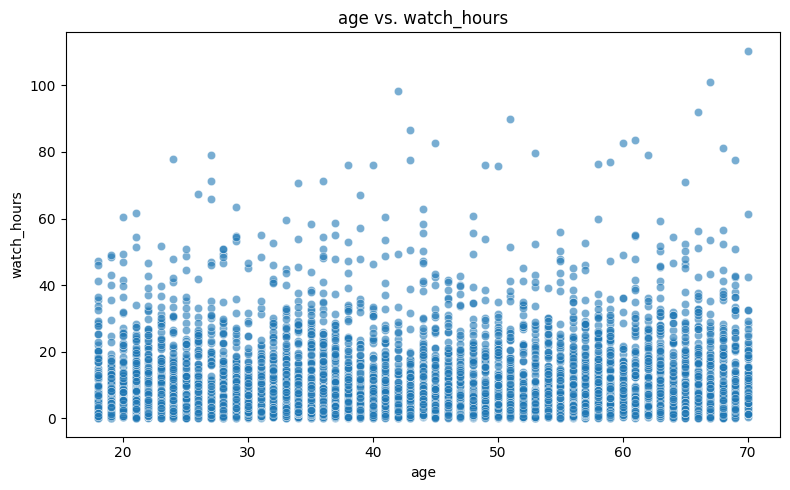

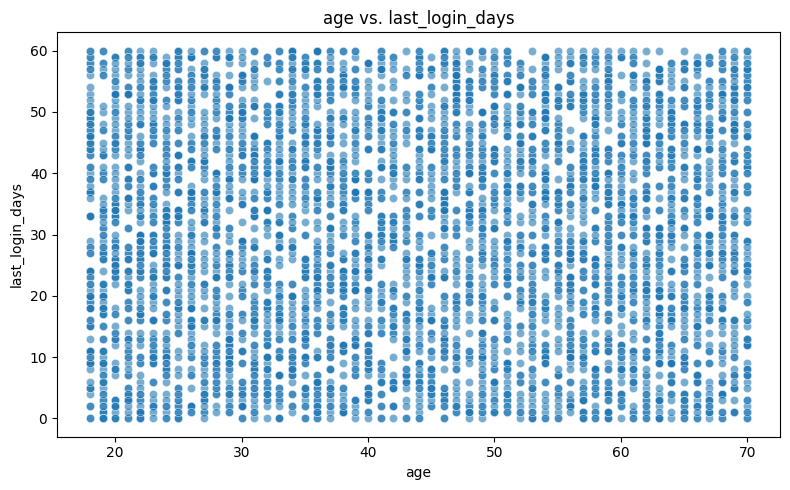

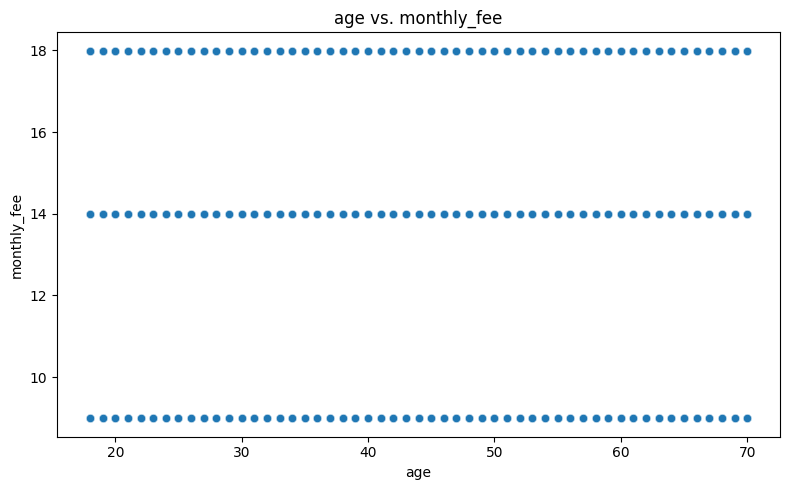

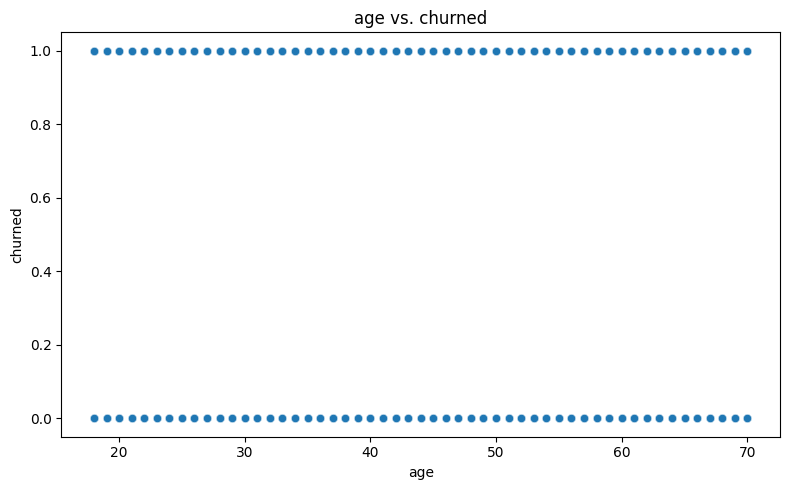

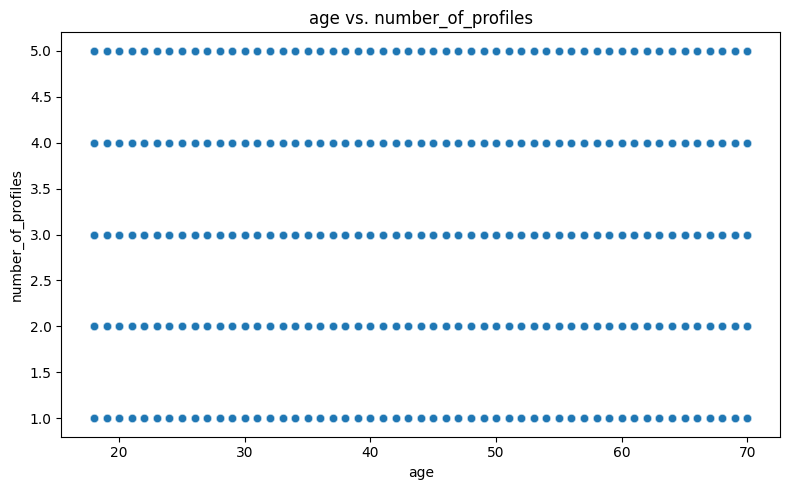

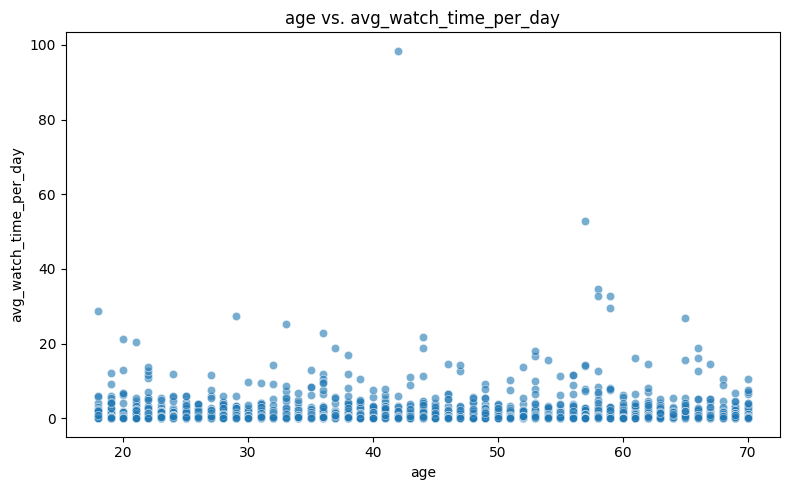

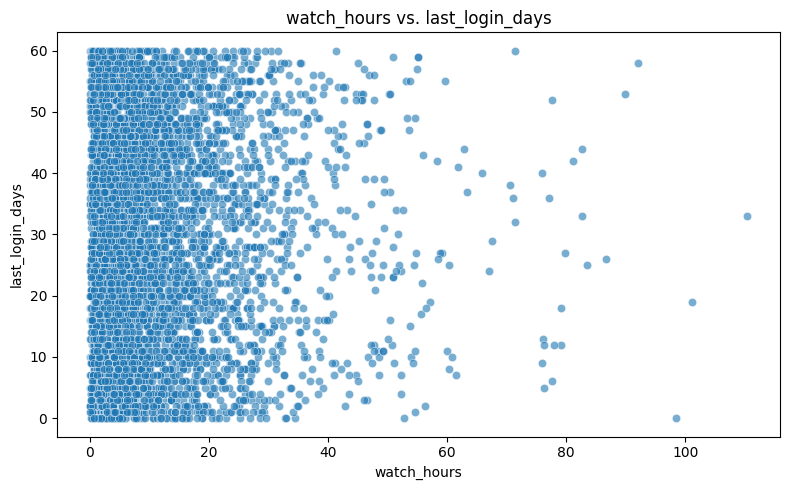

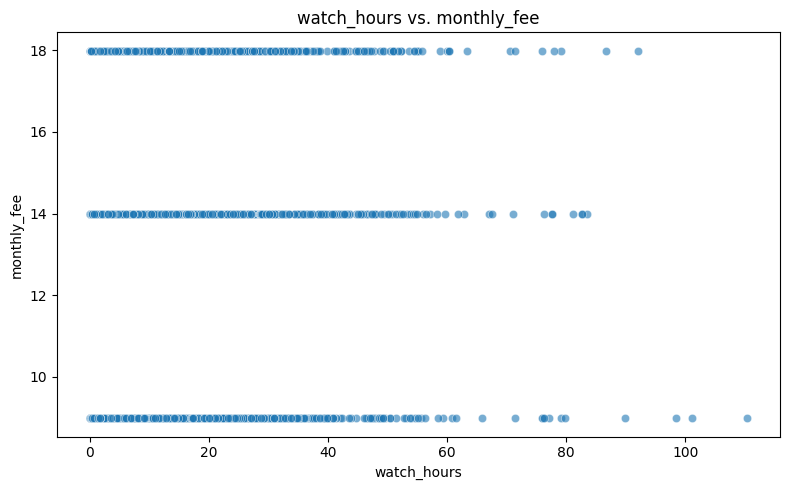

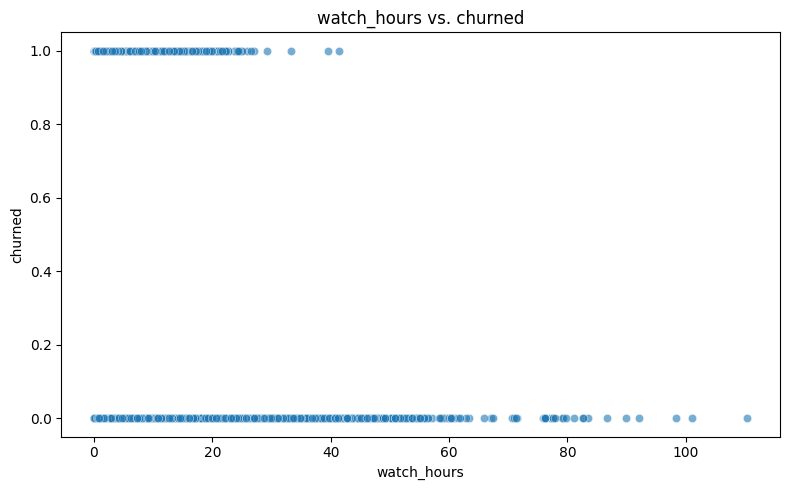

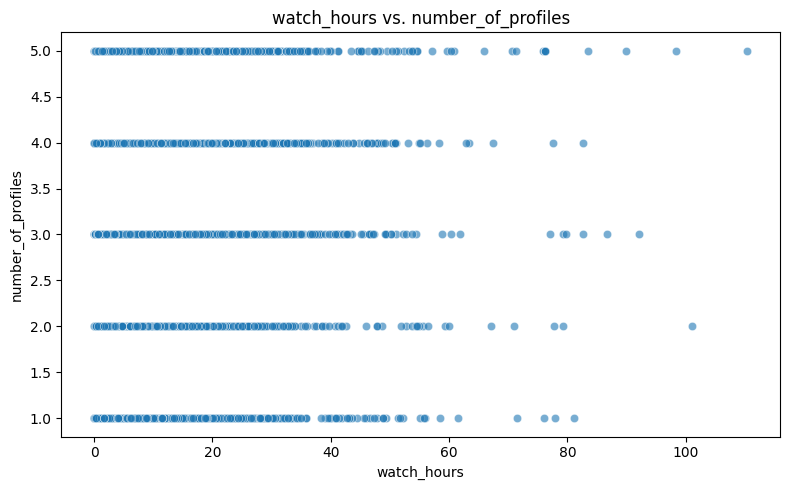

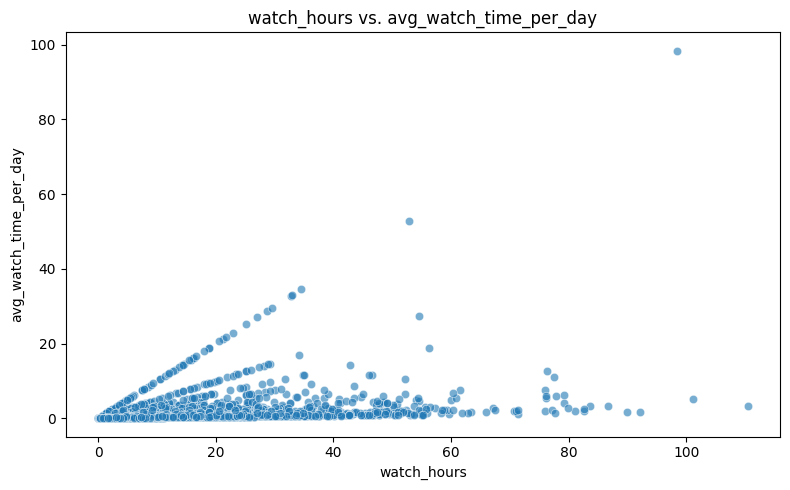

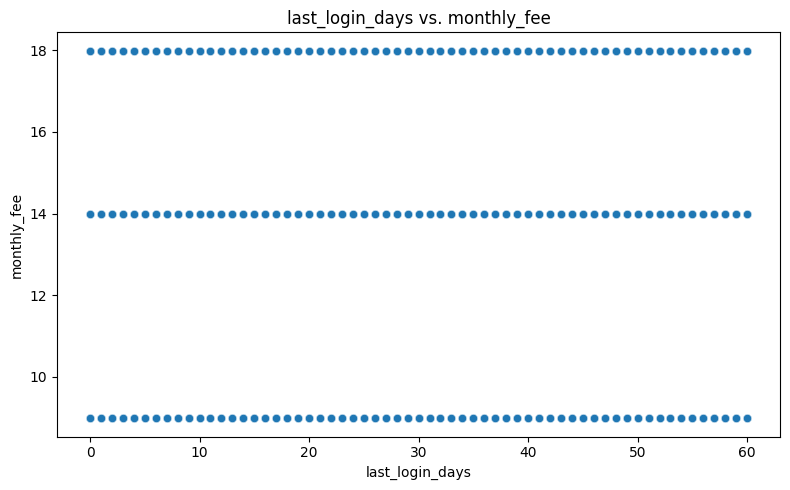

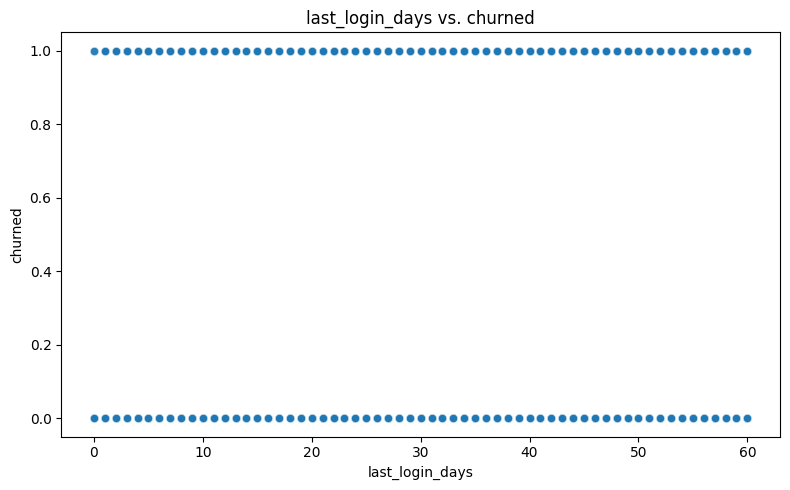

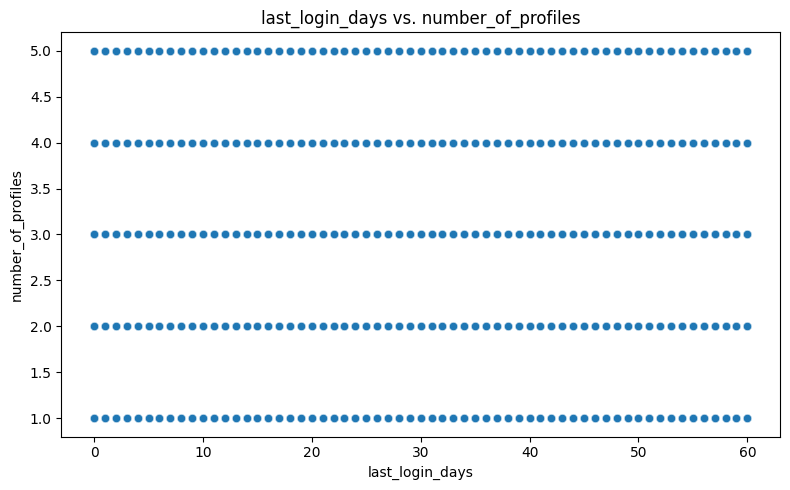

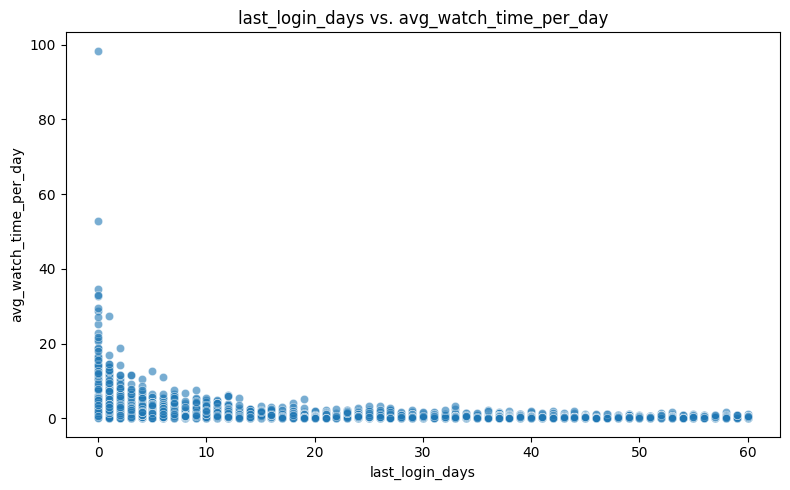

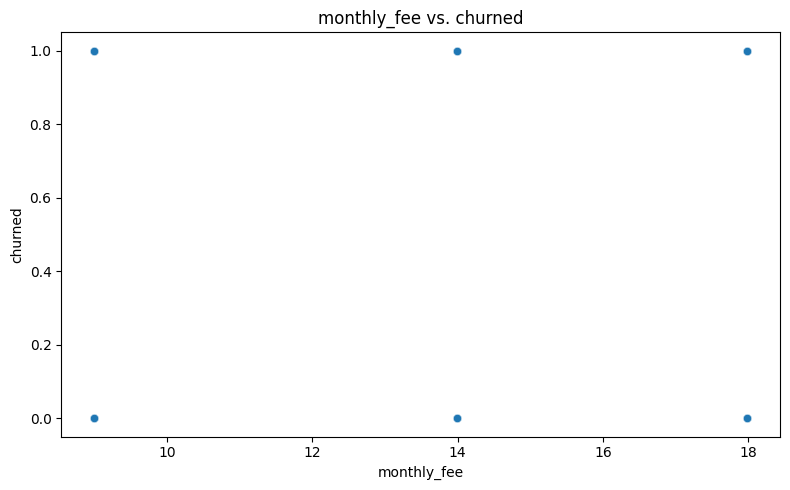

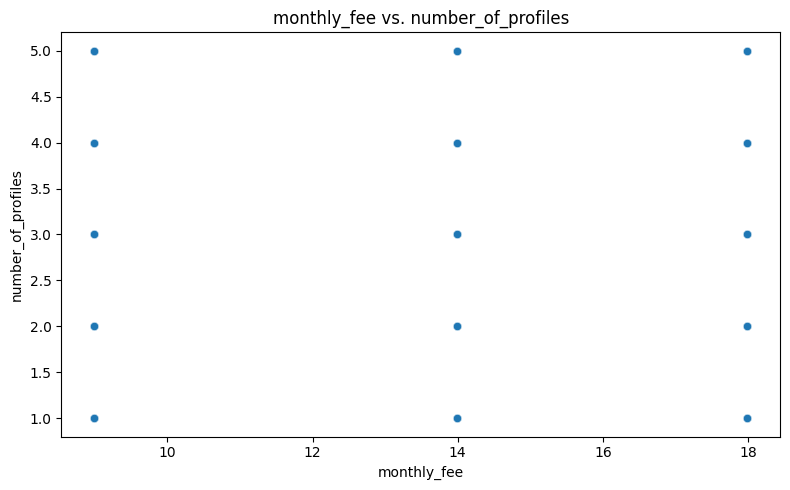

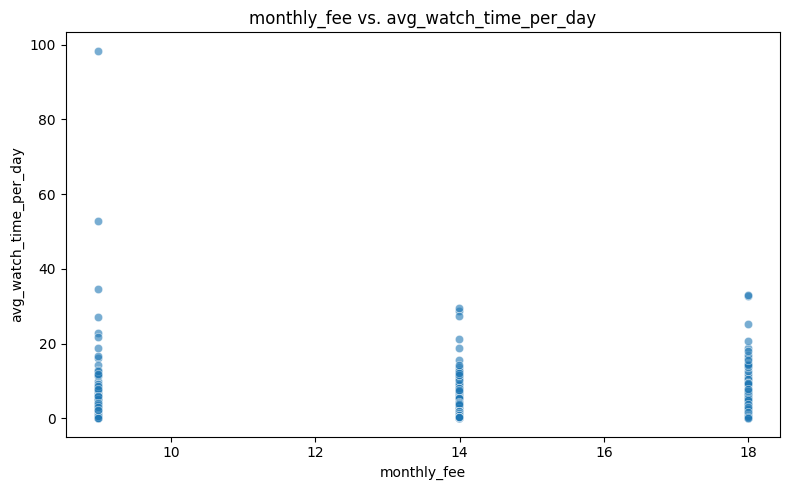

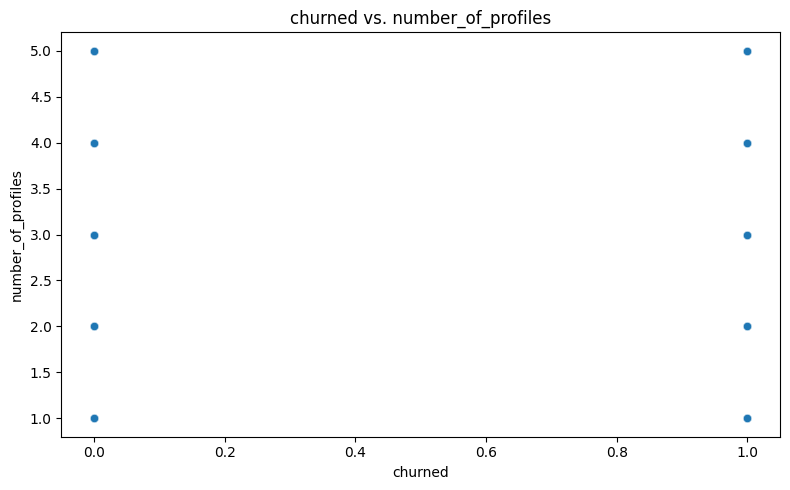

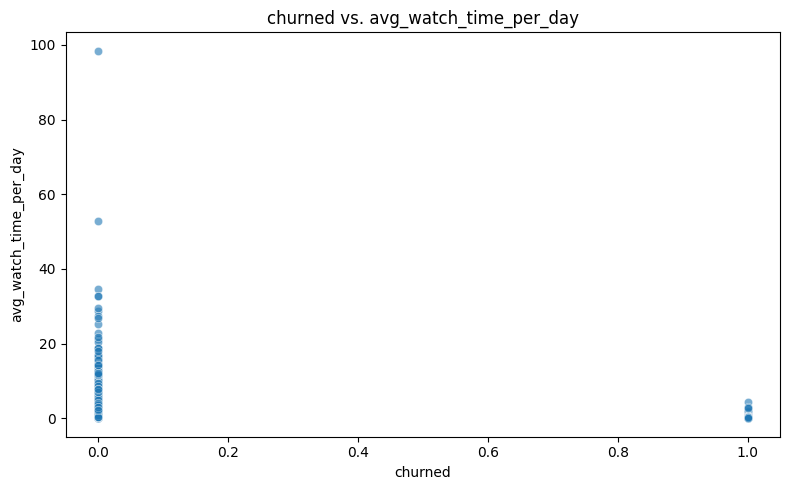

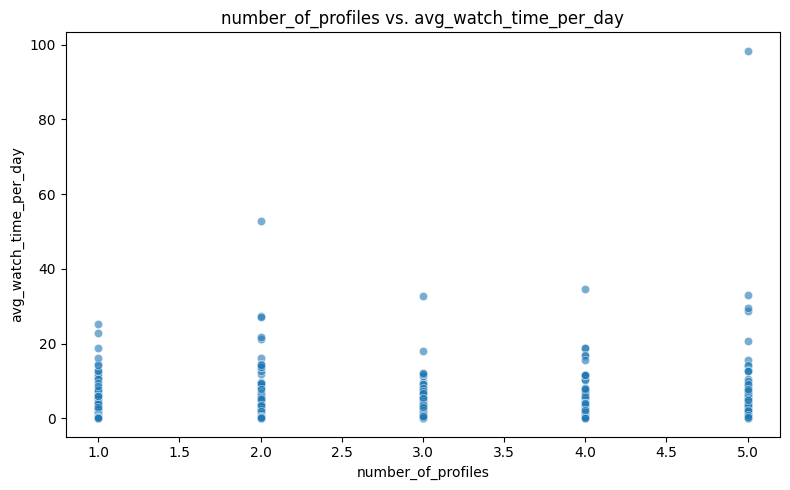

In [35]:
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

# Select continuous/numeric columns
continuous_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Loop through all unique pairs of continuous columns
for col1, col2 in itertools.combinations(continuous_cols, 2):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=col1, y=col2, data=df, alpha=0.6)
    plt.title(f'{col1} vs. {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.tight_layout()
    plt.show()

Age vs. Watch Hours:

Each point is a user.points are spread widely in watch hours for every age.

There is no clear trend between age and total watch hours.

Users of any age can be light or heavy viewers.

This suggests age alone does not determine how much content someone watches.

Age vs. last_login_days:

The points are not spread evenly, they are scattered across the entire distribution. There is no clear trend.

This shows that users of all age groups logged into Netflix either more than 60 days ago or less than 60 days ago.

These points do not clearly indicate exactly when users logged in on specific days.

Age vs. monthly_fee:

There is no relationship between age and monthly fee. This indicates that each user has a different subscription type.

The plot clearly shows that users across all ages have chosen different subscription types.


Age vs. churned:

The scatter plot shows the relationship between age (x-axis) and churned status (y-axis, where 0 = not churned and 1 = churned).

Each dot represents a user.

The main message is that there is no apparent relationship between age and whether a user has churned.

Users of all ages are found at both churn statuses—some have left the service (churned = 1), and some are still active (churned = 0), regardless of age.

The points for both churned and not churned are spread evenly across the entire age range, indicating that age does not predict whether a user will churn.

Age vs. number_of_profiles:

There is no clear trend or relationship between age and number of profiles.

People of virtually all ages have between 1 and 5 profiles.
This suggests that the number of profiles a user has does not depend on age—younger and older users alike may create multiple profiles, or just one.


Age vs. avg_watch_time_per_day:

The scatter plot shows how age and average watch time per day are related.

The points are spread out evenly across all ages, with no clear pattern.

This means people of any age can watch more or less each day.

But there are a few users who watch much more than others, which are seen as outliers.


Age vs. last_login_days:

This plot shows that there is no trend or relationship between last_login_days and watch_hours.

The points are scattered across the plot, which means a user’s watch hours do not depend on how many days ago they logged in.

Some users may log in after 60 days and still watch content, while others might log in within 60 days and watch.



Age vs. monthly_fee:

This scatter plot shows the relationship between watch_hours and monthly_fee.

There is no clear trend or pattern, indicating that the x-axis (watch_hours) does not depend on the y-axis (monthly_fee).

This means a user's watch hours are not influenced by their monthly fee.

The plot actually has three distinct horizontal lines at different monthly_fee levels, showing different subscription plans but no trend with watch_hours.

users with all subscription fee levels have a wide range of watch_hours.


Watch_hours vs. churned:

This plot shows that there is no clear trend or pattern.

It indicates that watch_hours does not depend on whether a user has churned or not.

Both churned and non-churned users are spread across a wide range of watch hours, with no clear separation or grouping.

Some churned users may have high watch hours, while some non-churned users may have low watch hours—so watch_hours does not directly predict churn.


Watch_hours vs. number of profiles:


This plot shows a scattered distribution between watch_hours and number_of_profiles.

There is no clear relationship or trend between the x-axis and y-axis.

Users with different numbers of profiles are spread across a wide range of watch hours, with no clear grouping.

Some users with more than one profile may watch more over time, but overall, there is no consistent relationship, and the points are not evenly spread.

Having multiple profiles does not guarantee higher watch hours, as the plot shows overlapping points for all profile counts.


Watch_hours vs. avg_watch_time_per_day:


This plot shows a scattered distribution between watch_hours and number_of_profiles.

There is no clear relationship or trend between the x-axis and y-axis.

Users with different avg_watch_time_per_day are spread across a wide range of watch hours, with no clear grouping.

The data is widely spread, indicating that average daily viewing does not directly depend on total watch hours, and each user’s pattern of viewing can vary greatly.


last_login_days vs monthly_fee

plot shows that  the data points are spread across three horizontal bands, each representing a different monthly fee.

users can have logged in recently or not recently—there's no pattern.

there is no pattern or relationship between this variable.

last_login_days vs monthly_fee

The plot shows that the data is fairly evenly spread.

It displays users across all last_login_days for both churned and non-churned categories.

The x-axis shows last_login_days (how many days since the last login), and the y-axis shows churn status (0 or 1).

It also shows that users who churned last logged in across a wide range of days, similar to those who did not churn.

Since the data is imbalanced, there is no clear pattern or dependency between last_login_days and churn status.


last_login_days vs number_of_profiles

The points are spread evenly across last_login_days and number_of_profiles.

There is no pattern or clustering between these two axes.

Users have logged in with various subscription types and monthly fees.

The variables appear to be independent of each other, and no clear pattern stands out.



last_login_days vs avg_watch_time_per_day

The points show a right skew, indicating that values are higher on the left and gradually decrease toward the right. This is known as a positive skew.

As the number of days since the user last logged in increases, the average watch time decreases, which is not a good sign for the service.

This plot shows a negative relationship between the two variables, as watch hours suddenly drop while the number of logged days increases.This means the data is not evenly spread.


monthly_fee vs churned:

The points are plotted fairly evenly across both the x-axis and y-axis.

Both churned and non-churned users are distributed across all monthly fee levels, with similar representation in each category.

Once users have canceled their service (churned), they are no longer able to continue watching content.

Based on this, there is no clear pattern or trend between the two variables.

monthly_fee vs number_of_profiles:

The points show that users have different numbers of profiles and are paying different amounts per month.

The plots shows the relation between monthly_Fee and number of profiles.

There is no pattern or trend across the monthly_fee and number of profiles.

the plot indicates that number of profiles does not predict monthly fee, and the reverse is also true.



monthly_fee vs avg_watch_time_per_day:

This point shows that users paying different monthly fees have different average watch times per day across the three subscription types.

There is no clear pattern or relationship between these two variables, all subscription levels show a wide range of daily watch times, but most users have low averages..

However, for users paying less than $10 per month, the average watch time appears to be higher.


churned  vs number_of_profiles:

The plot shows that there is no clear pattern or trend between these variables.

Each user who has canceled the service may have previously had a high or low number of profiles, similar to users who continue to watch the service.

Since the points are spread fairly evenly, the data shows no dominant group or apparent imbalance across the variables.


churned vs avg_watch_time_per_Day:

Users who canceled their service exhibited higher average watch times per day compared to those with active profiles.

Based on the plot, the data is scattered across the graph, so there is no clear pattern or clustering between these two variables.

Those who maintained active profiles did not consistently watch each day during the observed timeframe.


number_of_profiles vs avg_watch_time_per_Day:

The points are scattered across the variables, so there is no clear pattern or relationship between them.

Users with more or fewer profiles may not have similar watch times throughout the day.

While most users with any number of profiles have similar (and typically low) average watch times, there are a few outliers—particularly among those with 2 profiles—who have unusually high watch times per day.











In [36]:
print(df.columns.tolist())

['age', 'gender', 'subscription_type', 'watch_hours', 'last_login_days', 'region', 'device', 'monthly_fee', 'churned', 'payment_method', 'number_of_profiles', 'avg_watch_time_per_day', 'favorite_genre']


## Bivariate analysis for categorical column

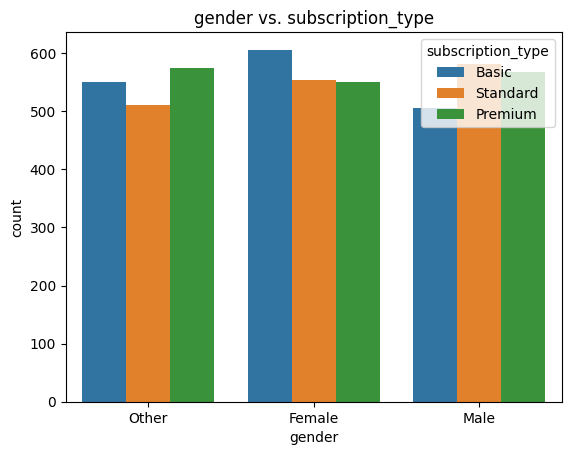

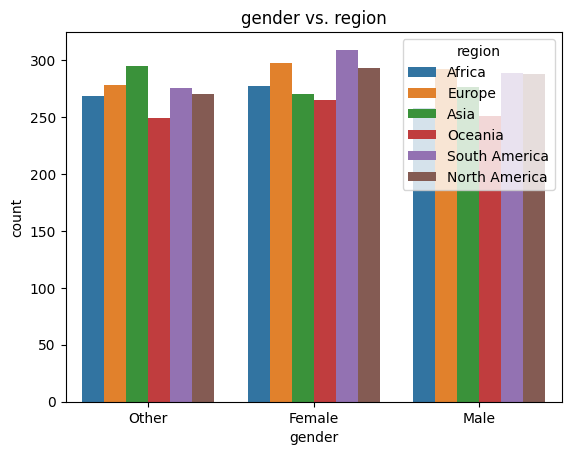

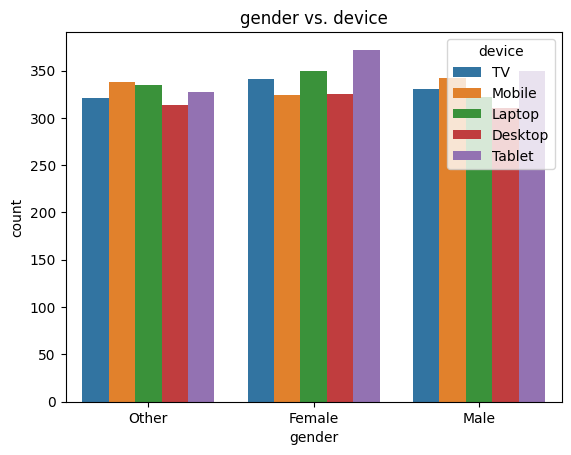

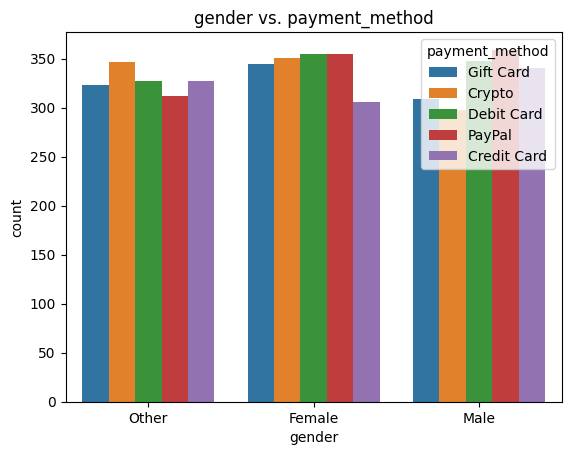

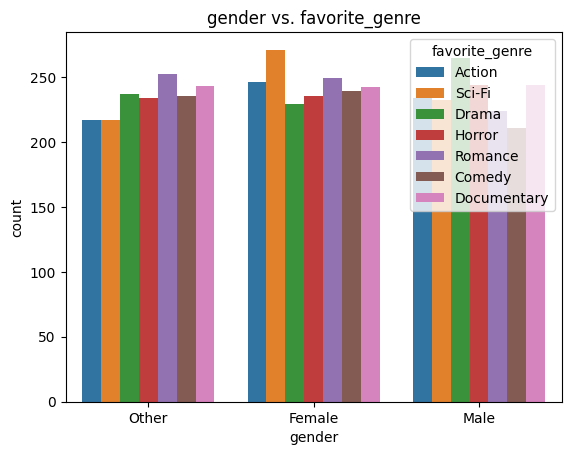

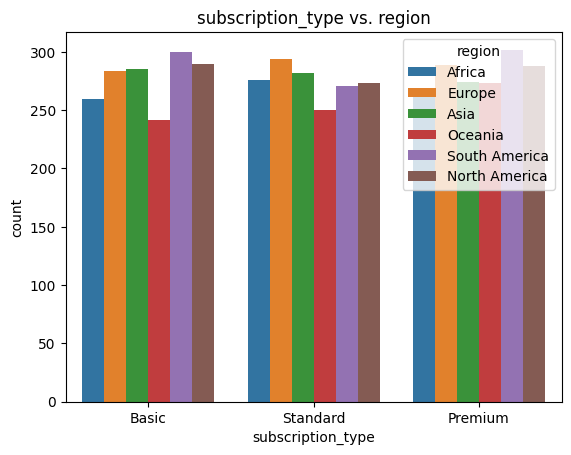

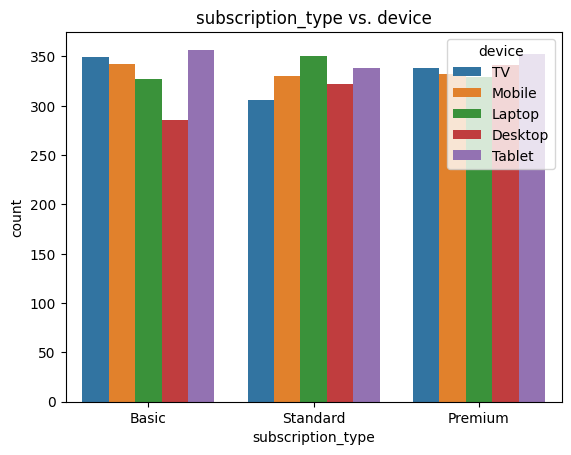

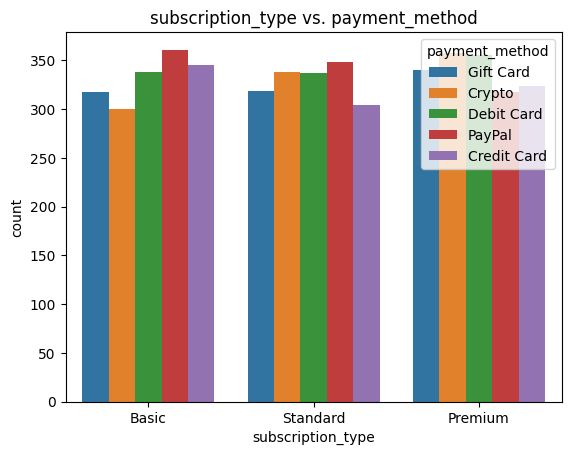

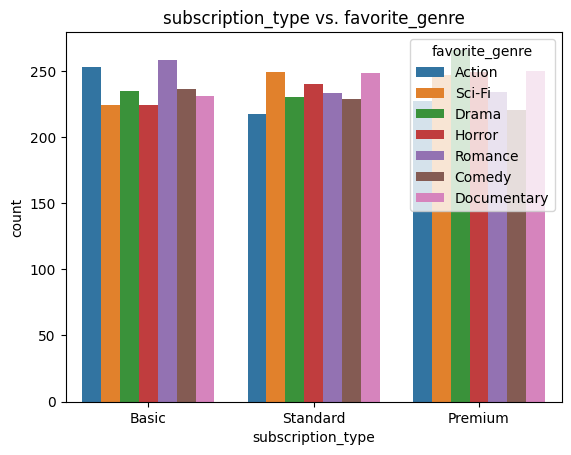

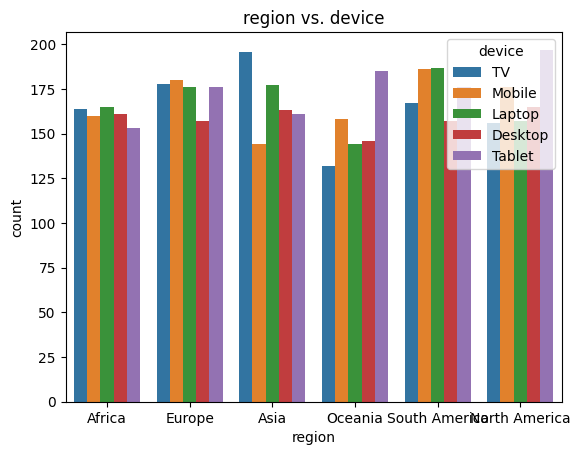

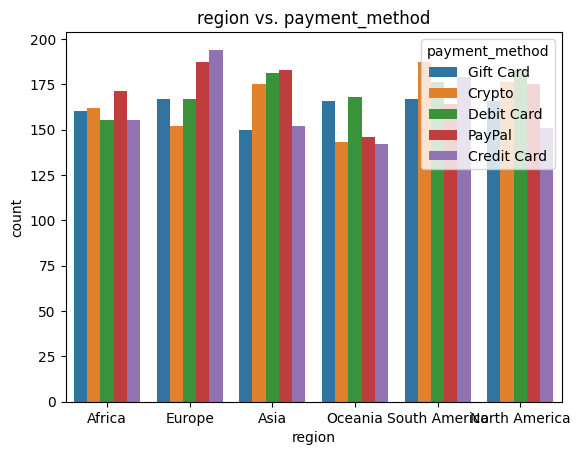

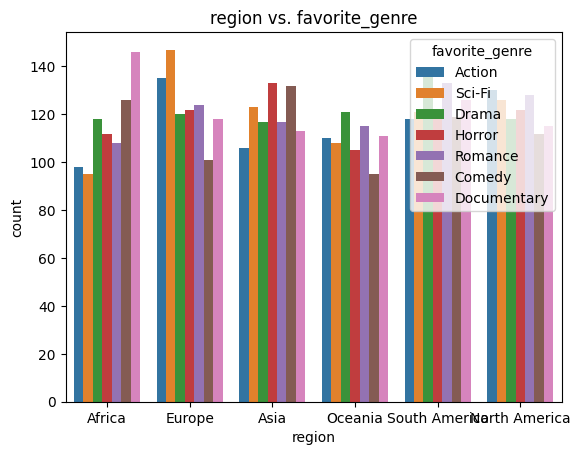

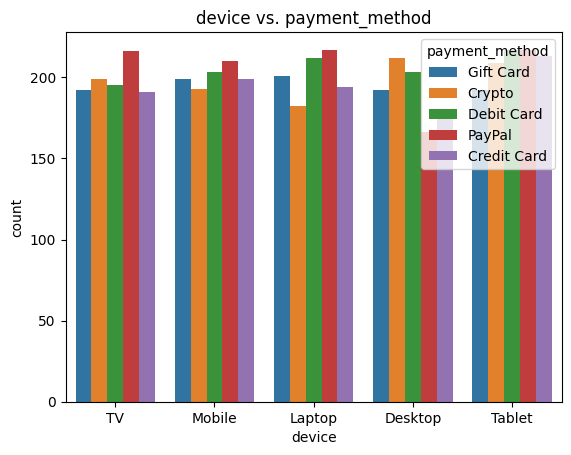

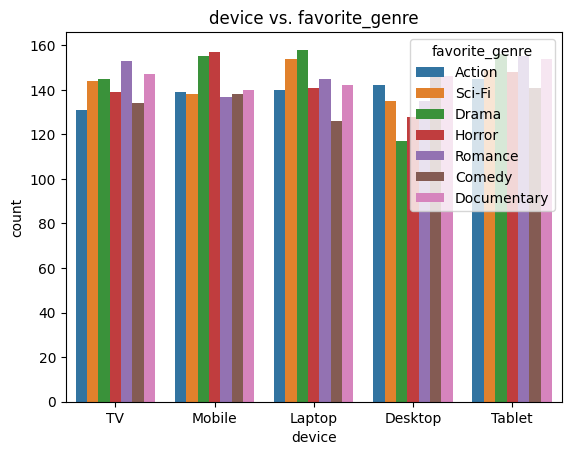

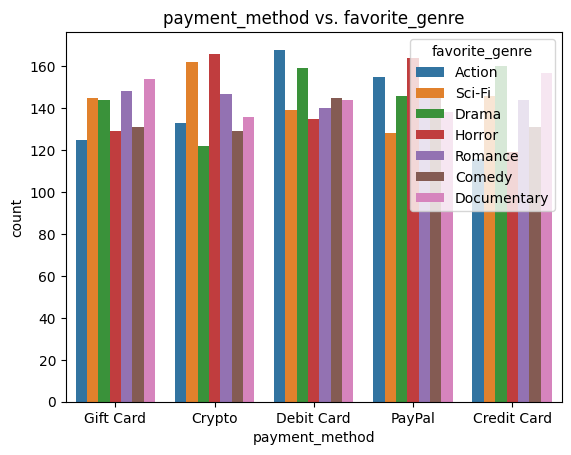

In [37]:
import itertools

categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Loop through all unique pairs
for col1, col2 in itertools.combinations(categorical_cols, 2):
    sns.countplot(x=col1, hue=col2, data=df)
    plt.title(f'{col1} vs. {col2}')
    plt.show()


gender vs subscription:

The bar counts are relatively similar across all gender categories for each subscription type.

This suggests that users are fairly evenly distributed among all subscription categories, regardless of gender.

However, the bar for Female users is the highest in the Basic subscription group, indicating that more female viewers prefer the Basic plan.

After the Basic plan, the Premium and Standard subscriptions have a slightly higher number of viewers within the Male and Other gender categories compared to their counts in the Basic group.


Gender vs Region:

The bar counts are relatively similar across all gender categories for each region, indicating a fairly balanced distribution of users among regions regardless of gender.

Female users show the highest count in the South America region, with North America and Oceania following.

Among users classified as 'Other', Asia has the highest number, followed by Europe, South America, and North America.

For male users, Europe shows the highest number of users, followed by South America and North America.

In summary, female users are most numerous in South America. For male and 'Other' gender categories, the greatest counts after female users are observed in Asia and Europe, respectively.


Gender vs Device:

In this bar chart, more female users are watching on tablets than any other gender or device type.

Tablet use is also common among male and other users, but not as much as for females.

For male and other users, the number of viewers is about the same for mobile, laptop, and TV.

Overall, tablets are most popular with female users, while the other devices are used more evenly by the other genders.


Gender vs favorite:

In the female category, the bar heights are similar across all payment methods, indicating that female users are fairly evenly split among PayPal, debit card, crypto, gift card, and credit card.

However, PayPal and debit card are used slightly more frequently by female users than the other payment methods.

In the male category, PayPal is the most commonly used payment method, with only small differences in usage compared to other options.

For users identified as 'Other', crypto is the most preferred payment method, but the preference is only marginally higher than for the other payment options.

Overall, payment method usage is quite balanced across all genders, with PayPal and debit card being the most commonly used methods for both female and male users.


Gender vs favorite_Genre:

The bar counts vary noticeably across gender and favorite genre categories, indicating that viewers do not watch all genres equally.

For female users, Sci-Fi is the most watched genre, as shown by the highest bar in this category.

Among male users, Drama has the highest viewership, representing the most preferred genre for this group.

In the 'Other' gender category, Romance has the largest number of viewers compared to other genres.

Overall, Sci-Fi, Drama, and Romance emerge as the most popular genres, but preferences differ by gender group.


subscription_type vs region:

The bars show that user numbers are almost the same across all subscription types and most regions.

Oceania has the fewest users, which means not many people use Netflix there.

South America has the most users for all types of subscriptions.

Africa, Europe, North America, and Asia have similar numbers of users, with only small differences between them.



subscription_type vs device:


The bar chart shows that for the Basic subscription, tablet usage is the highest among devices.

For the Standard subscription, laptop usage is most common.

In the Premium subscription, tablet usage is also highest, with a count similar to that in the Basic plan.

Overall, tablet usage is highest in both Basic and Premium subscriptions, with only a small difference between these two categories.

Device preferences vary across subscription types, as the counts for each device type change between categories.

However, it is clear that many users prefer watching Netflix on a tablet, regardless of their subscription type.


subscription_type vs payment_method:

For the Basic subscription, most people watch Netflix using a tablet.

The Standard subscription has the highest number of users watching on a laptop.

In the Premium subscription, tablets are again the most used device, with similar numbers to the Basic plan.

Tablets are the top device for both Basic and Premium subscriptions, with only a small difference between the two.

The preferred device changes depending on the subscription type, so device preference varies across categories.

Overall, many users like to watch Netflix on a tablet, no matter which subscription type they have.


subscription_type vs favorite_genre


Across the Basic, Standard, and Premium subscriptions, Drama is the most watched genre, followed closely by Romance and Documentary. These three genres consistently have the highest viewer counts among all subscription types, indicating their broad popularity.


region vs device:

People in all regions (Africa, Europe, Asia, Oceania, South America, and North America) watch Netflix using a variety of devices: TV, mobile, laptop, desktop, and tablet.

The number of users for each device is similar within each region; no single device overwhelmingly dominates.

Asia and North America have slightly higher total user counts across devices compared to other regions, but every region shows use of all devices.

Overall, TVs and tablets are among the most used devices, but laptops, desktops, and mobile phones are also popular choices in every region.

This shows that Netflix viewers around the world use many kinds of devices, with device usage patterns being broadly similar from region to region.

region vs payment_method:

In Europe, credit cards are the most commonly used payment method, followed closely by PayPal.

In South America, cryptocurrency is the most frequently used payment method, though the usage of other payment types is also substantial.

Across all regions, users pay for Netflix with a variety of methods, such as credit cards, PayPal, cryptocurrency, debit cards, and gift cards—the bar heights are relatively similar, showing no single method overwhelmingly dominates.

When comparing regions and payment methods, Europe has the highest number of users paying with credit cards.

Overall, every region shows a mix of payment method preferences, with only slight differences between the most and least popular options.

Region vs favorite_Genre:

The bar counts vary across all variables (region and favorite genre), with some bars higher and others lower. This indicates that users did not watch the same favorite genres across different regions.

Among the regions, Europe has the highest number of Sci-Fi viewers. Although Africa also shows a high count, the most-watched genre there is different. Other regions display mixed genre preferences.

In conclusion, Africa and Europe have the highest number of viewers overall, especially for Documentary and Sci-Fi genres and no single genre is the top favorite everywhere.


Device vs Payment:

The bar heights look almost the same for all devices and payment methods. This means people use different types of devices and payment methods to watch Netflix—no single option is used the most.

A few more people use TV and tablets with PayPal, credit cards, or debit cards, so these are a bit more popular. But overall, all devices and payment methods are used often, showing that people have different preferences.

In short, TV and tablet users who pay with PayPal, credit, or debit cards are the biggest groups, but all other options are also used fairly equally.


Device vs Genre:

Most of the bars are about the same height. This means that no single device or genre is the most popular—people watch all kinds of genres on all types of devices.

In some cases, genres like Drama, Horror, or Documentary are watched a little more on certain devices, but the difference isn’t big.

Some devices have a few more viewers for Comedy or Documentary, showing a small preference, but there isn’t one genre that everyone likes the most.


payment_method vs Genre:


The bars for Comedy, Drama, and Documentary are often a bit taller for some payment methods, but the difference is not very big.

For some methods, like Credit Card and PayPal, the Documentary and Comedy bars are a little higher, hinting at a mild preference.


People pay for movies in many different ways and watch all genres almost equally.

No single payment method or genre is the clear favorite.

Everyone has different tastes, and every genre is enjoyed across all ways to pay.












In [38]:
print(df.columns.tolist())

['age', 'gender', 'subscription_type', 'watch_hours', 'last_login_days', 'region', 'device', 'monthly_fee', 'churned', 'payment_method', 'number_of_profiles', 'avg_watch_time_per_day', 'favorite_genre']


## MULTIVARIATE ANALYSIS:

📊 Pairplot: Numeric Variable Relationships


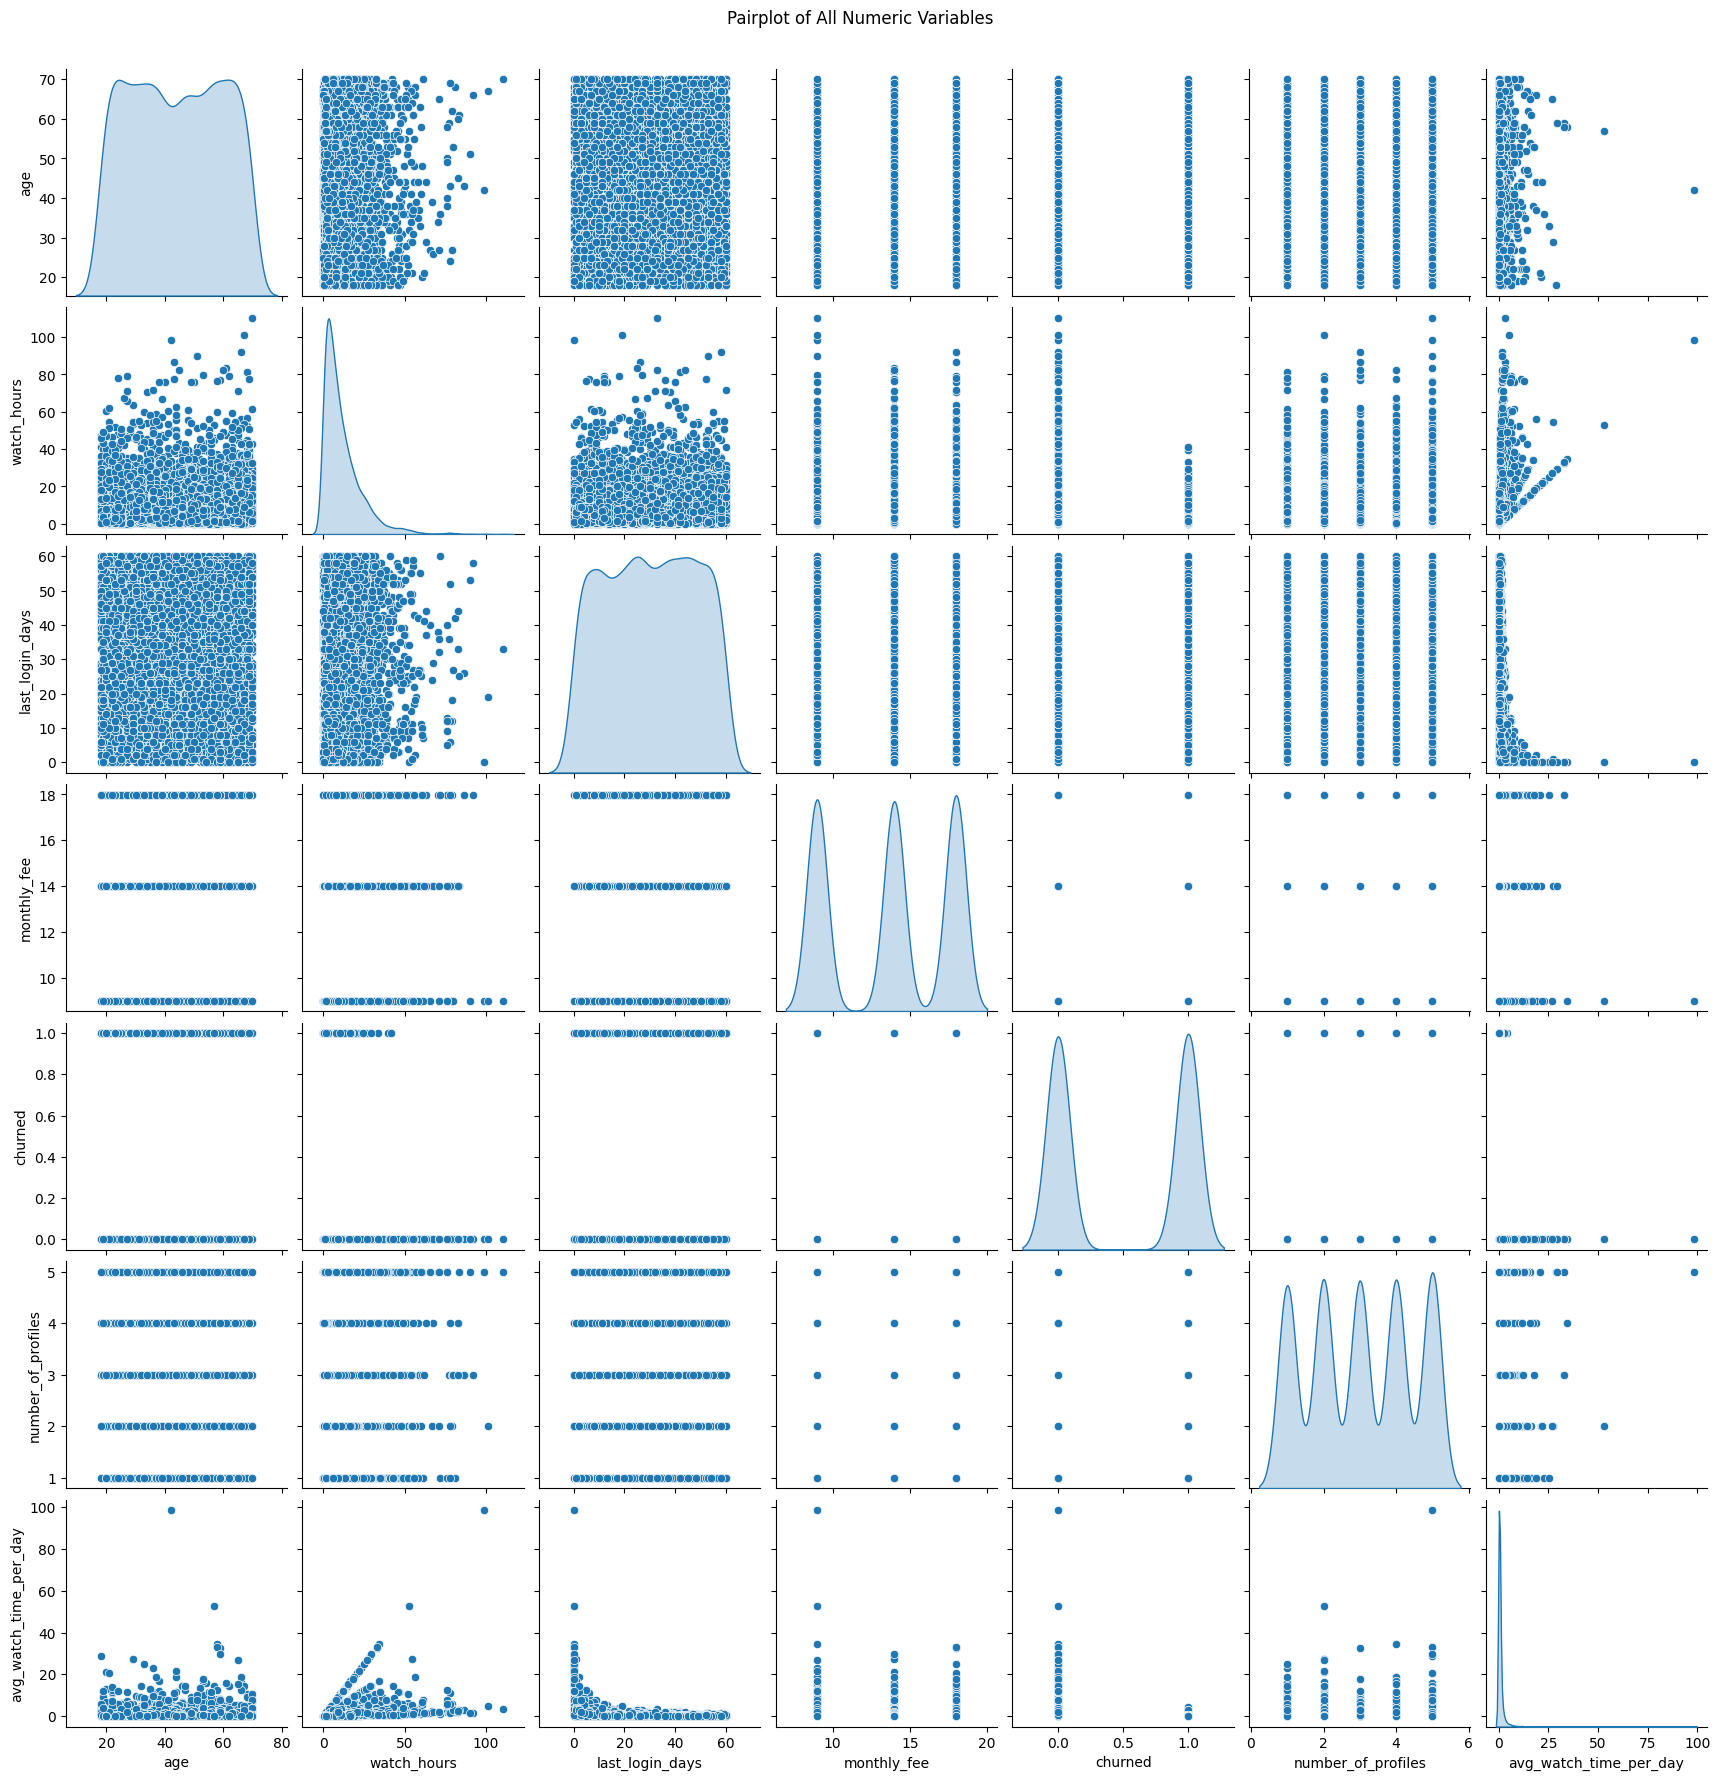

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
# df = pd.read_csv("your_dataset.csv")

# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# 1️⃣ Pairplot for all numeric variables
print("📊 Pairplot: Numeric Variable Relationships")
sns.pairplot(df[numeric_cols ], diag_kind='kde')

plt.suptitle('Pairplot of All Numeric Variables', y=1.02)
plt.show()




INSIGHTS:

There are no strong patterns between the different numbers—most things don’t seem directly connected.

Most people are similar, but there are a few unusual users with much higher watch times (outliers).

The data is spread out for most variables.

It’s hard to predict if someone will leave (churn) just by looking at these numbers.

# Heatmap for correlation between numeric variables

📈 Correlation Heatmap


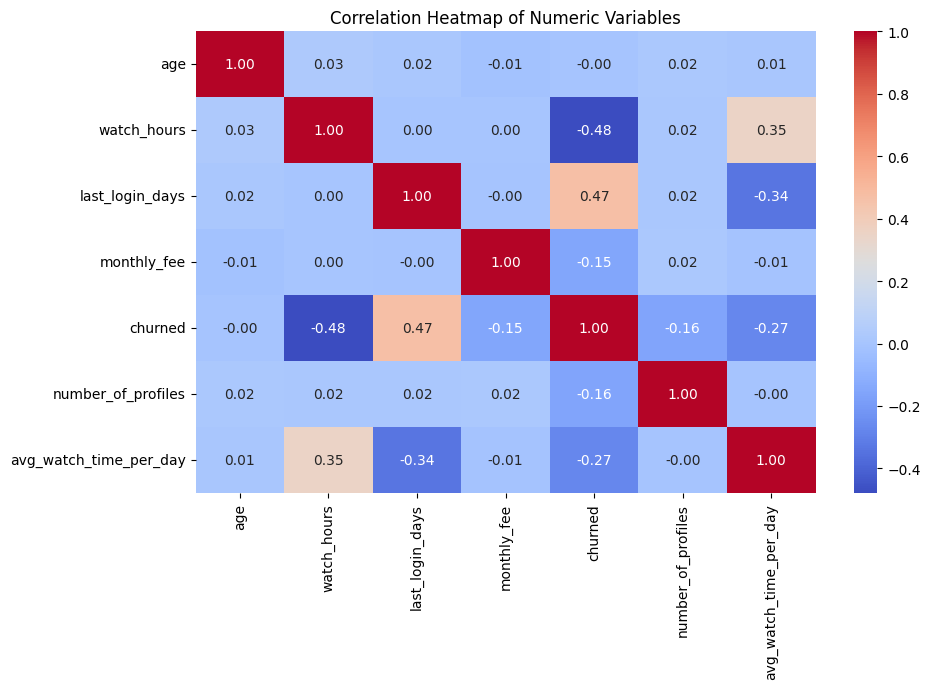

In [40]:

print("📈 Correlation Heatmap")
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

The numbers in  correlation heatmap show how strongly each pair of variables are related to each other, on a scale from -1 to 1:

1 means a perfect positive relationship: As one variable goes up, the other always goes up.

-1 means a perfect negative relationship: As one goes up, the other always goes down.

0 means no relationship: The two variables don’t affect each other.

What do the numbers in  heatmap say?

Most of the numbers are close to 0. This means that most variables don’t have a strong connection.

The strongest negative number is -0.48 for watch_hours and churned. This means that people who watch more hours are less likely to leave (churn).

The strongest positive number is 0.47 for last_login_days and churned. This means people who haven’t logged in for many days are more likely to leave.

Watch_hours and avg_watch_time_per_day have a positive link (0.35)—people who watch a lot overall also watch more per day.

All other numbers are low, meaning weak or no visible relationships.

In short, the numbers show how much two things move together, but most pairs don’t have a strong connection in  data. Only a few pairs, like watch_hours with churn and last_login_days with churn, show a noticeable link.



In [41]:
df.shape

(5000, 13)

In [42]:
print(df.columns.tolist())

['age', 'gender', 'subscription_type', 'watch_hours', 'last_login_days', 'region', 'device', 'monthly_fee', 'churned', 'payment_method', 'number_of_profiles', 'avg_watch_time_per_day', 'favorite_genre']


## CHECKING THE OUTLIER FOR CONTINOUS COLUMN

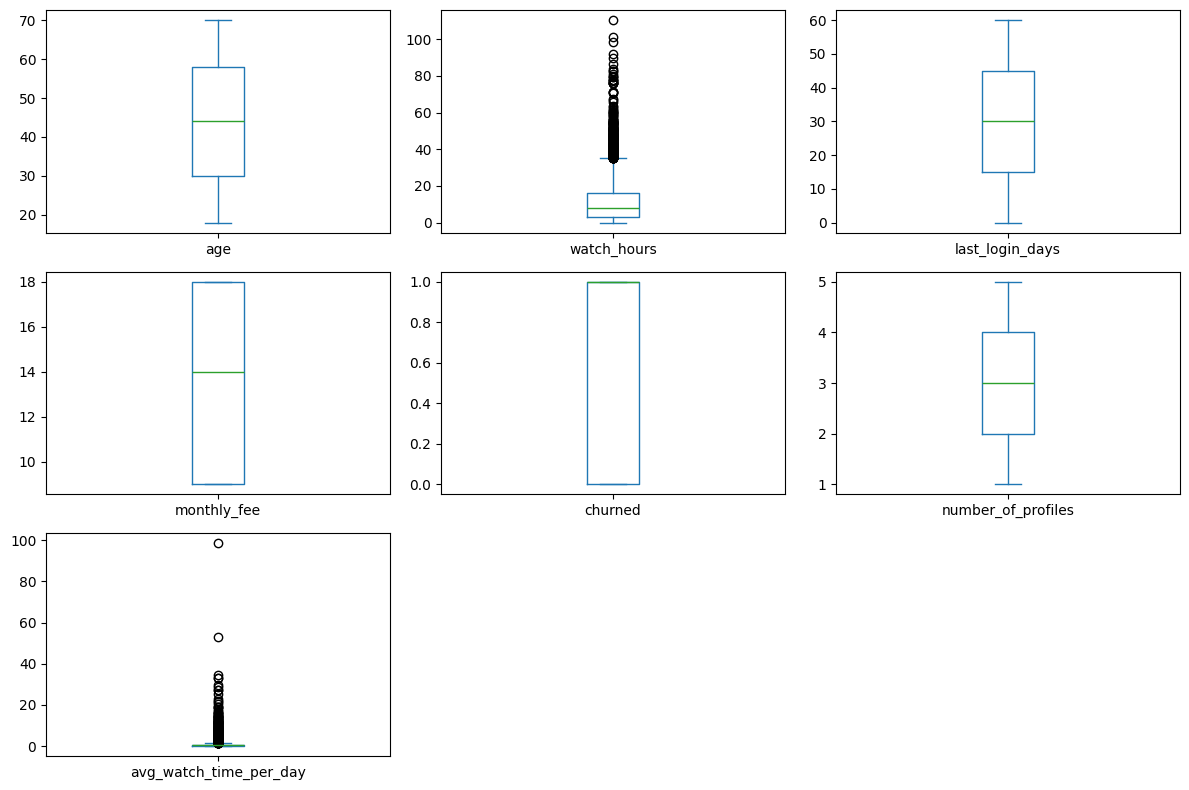

In [43]:
# Only plot boxplots for numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Make boxplots
numeric_cols.plot(kind='box', subplots=True, layout=(3, 3), figsize=(12, 8), sharex=False, sharey=False)
plt.tight_layout()
plt.show()


In continous variable ,some column has outlier those are watch hours and avg_watch_time_per_day

Most users act in the same way. A few things are clear: people who watch more and log in often usually stay. But people who stop logging in often leave and watch less. Other patterns in the data are not very clear.


Among the continuous variables, both watch_hours and avg_watch_time_per_day have outliers. This means that while most users watch Netflix in similar amounts, there are a few users who stand out with extremely high watch hours or unusually high average watch times per day.

# CHECKING THE COUNTS OF CATEGORICAL VARIABLES AND CONTINUOUS VARIABLE

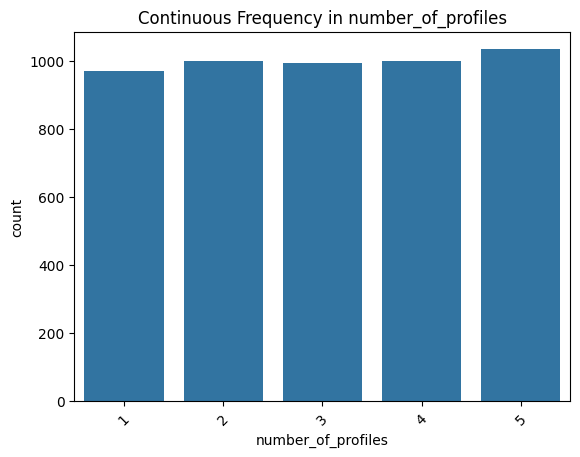

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for the 'region' column
sns.countplot(x='number_of_profiles', data=df)
plt.title('Continuous Frequency in number_of_profiles')
plt.xticks(rotation=45)  # rotates labels if they are long
plt.show()

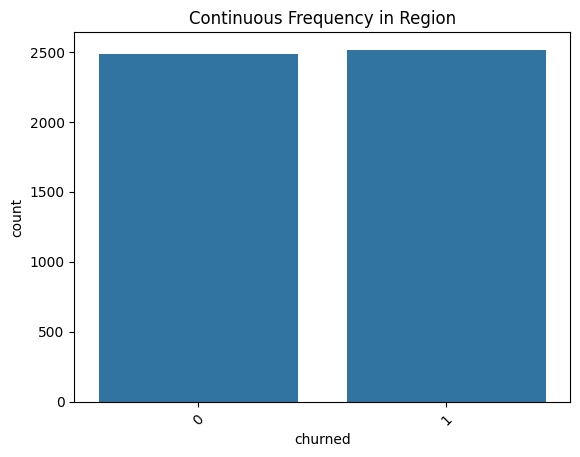

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for the 'region' column
sns.countplot(x='churned', data=df)
plt.title('Continuous Frequency in Region')
plt.xticks(rotation=45)  # rotates labels if they are long
plt.show()

##   CHECKING THE COUNTS FOR  CATEGORICAL  COLUMN

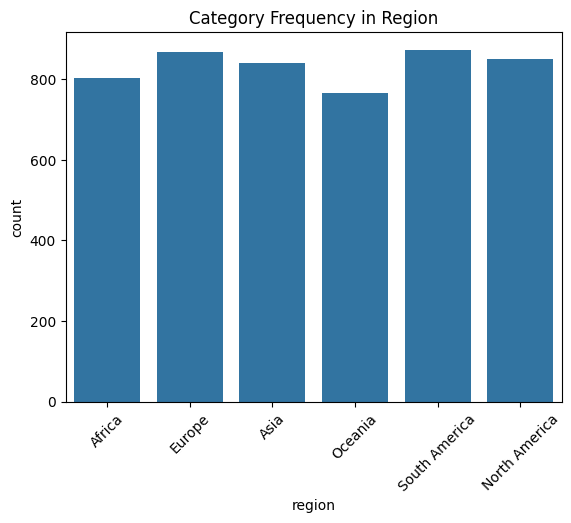

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for the 'region' column
sns.countplot(x='region', data=df)
plt.title('Category Frequency in Region')
plt.xticks(rotation=45)  # rotates labels if they are long
plt.show()

The bar chart shows the number of entries for each region.

South America and Europe do have the highest counts (tallest bars).

The other regions—Africa, Asia, North America, Oceania—all have slightly lower, but similar, counts.

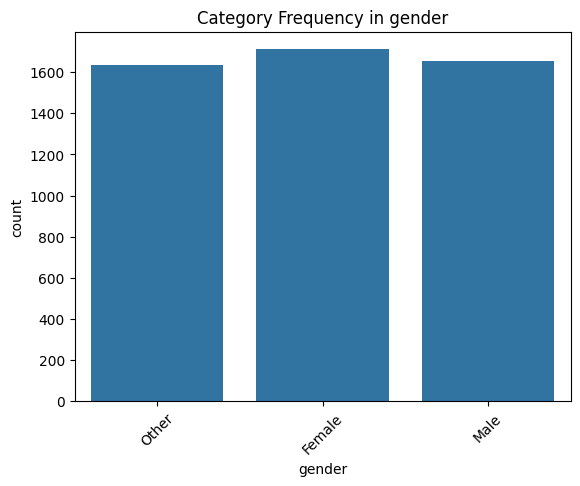

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for the 'region' column
sns.countplot(x='gender', data=df)
plt.title('Category Frequency in gender')
plt.xticks(rotation=45)  # rotates labels if they are long
plt.show()

The bar chart shows the counts the different kind of user in each gender.

Female do have the highest counts (tallest bars).

The other gender—male,other—all have slightly lower, but similar, counts.

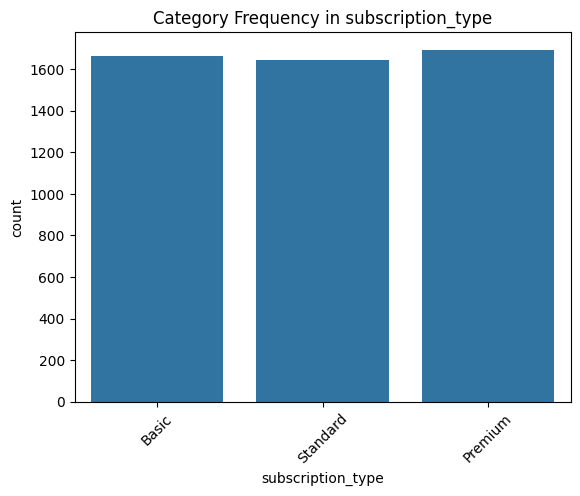

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for the 'region' column
sns.countplot(x='subscription_type', data=df)
plt.title('Category Frequency in subscription_type')
plt.xticks(rotation=45)  # rotates labels if they are long
plt.show()

The bar chart shows the counts of different users for each gender.

Females have the highest count (tallest bars).

The other gender—male,other—all have slightly lower, but similar, counts.

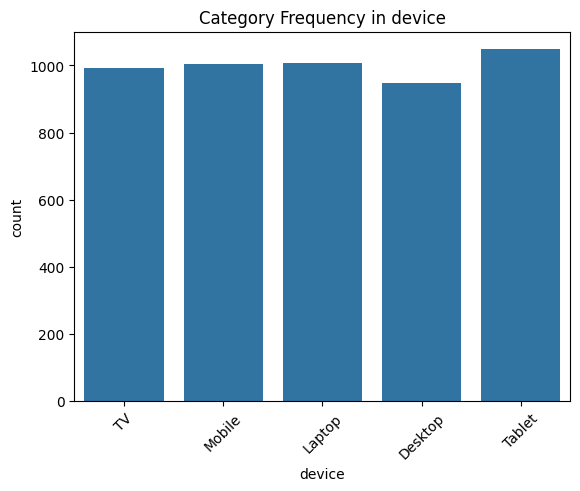

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for the 'region' column
sns.countplot(x='device', data=df)
plt.title('Category Frequency in device')
plt.xticks(rotation=45)  # rotates labels if they are long
plt.show()

The bar chart shows the counts of different types of device  for each device.

Tablets are the most used device.

the other devices have slightly lower but similar counts.

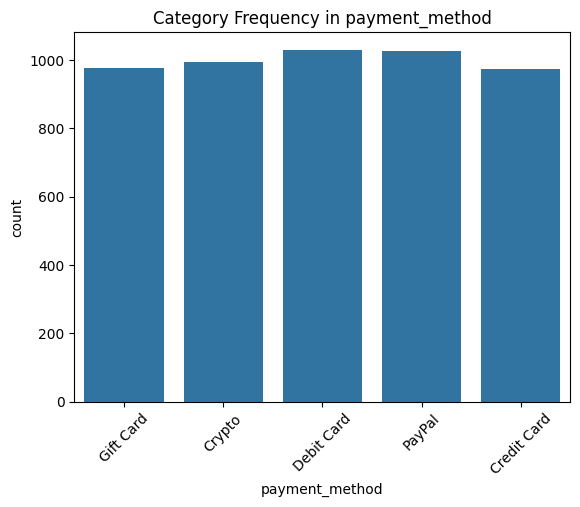

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for the 'region' column
sns.countplot(x='payment_method', data=df)
plt.title('Category Frequency in payment_method')
plt.xticks(rotation=45)  # rotates labels if they are long
plt.show()

Most users are paying with Debit Card or PayPal.

Other payment methods are used by slightly fewer people

Debit Card and PayPal are the top choices, but other payment methods are also used by many users at similar rate.

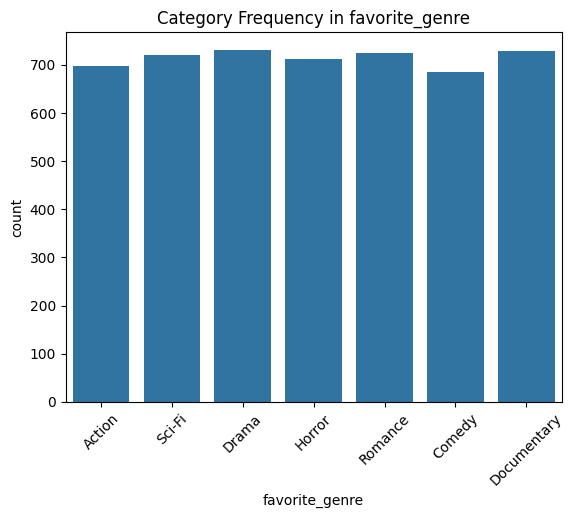

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for the 'region' column
sns.countplot(x='favorite_genre', data=df)
plt.title('Category Frequency in favorite_genre')
plt.xticks(rotation=45)  # rotates labels if they are long
plt.show()

This bar chart shows how many times each favorite genre appears.

Drama, Romance, and Documentary have the highest counts (tallest bars).

The other genres—Action, Sci-Fi, Horror, and Comedy—are slightly lower but have similar counts, just behind the top three.

Drama, Romance, and Documentary stand out as the most popular genres, with the others somewhat lower and close to each other.

## **Below checking the distribution of the numerical variables for each continuos column**

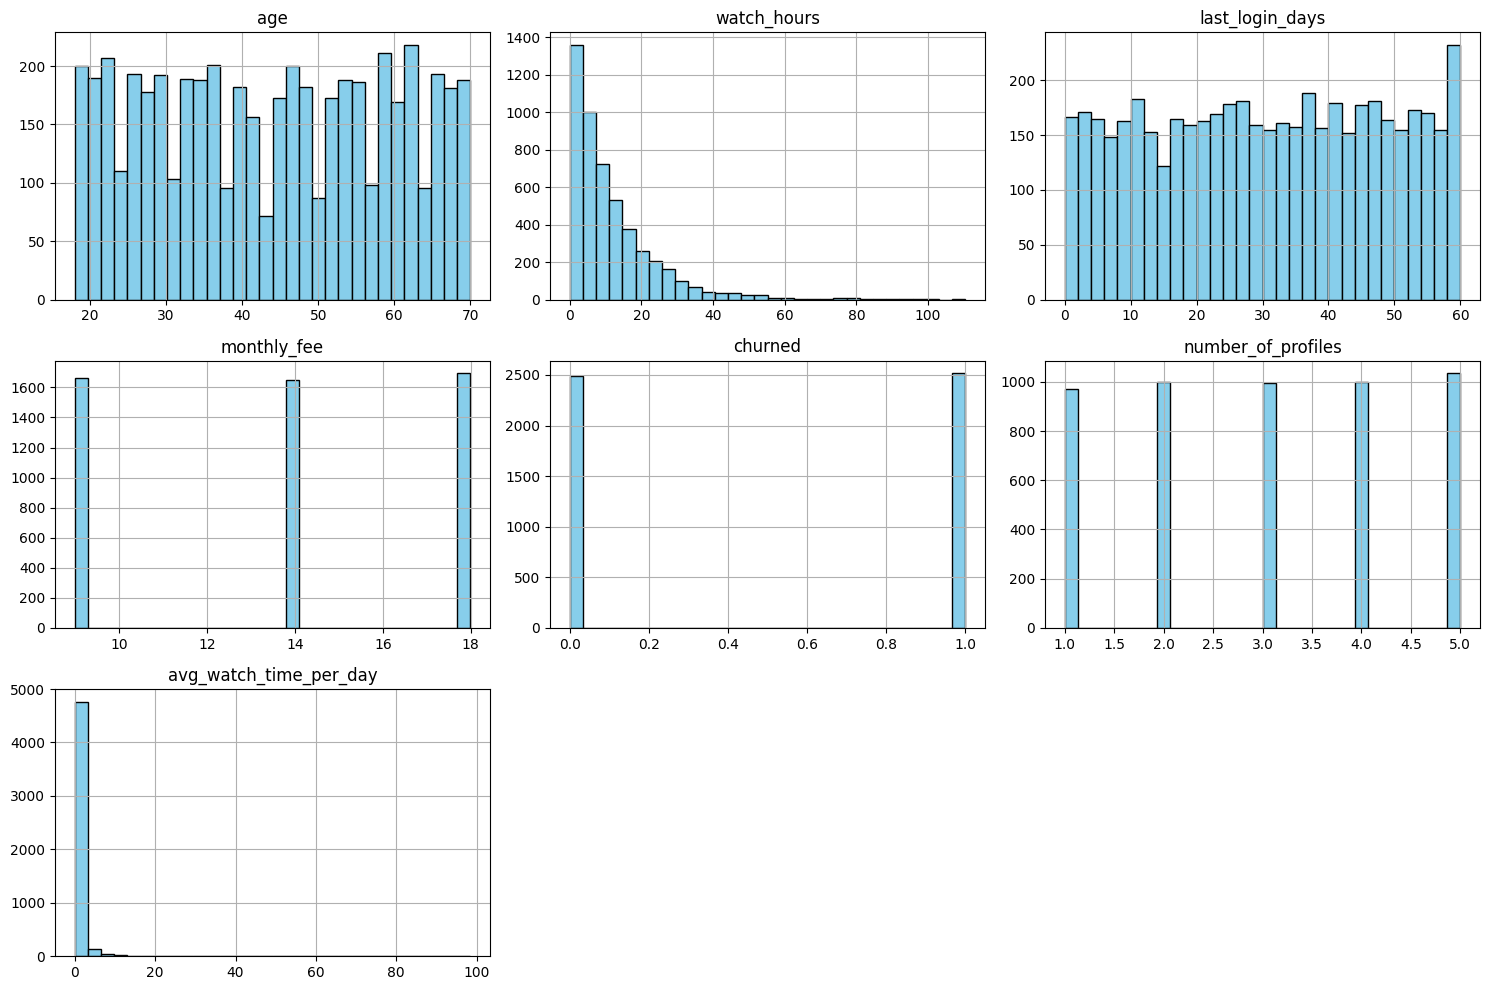

In [52]:
import matplotlib.pyplot as plt

df.hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

age: People in your data set are spread pretty evenly across all age groups, without any one age group being much larger or smaller than the others.

watch_hours & avg_watch_time_per_day: Most users watch only a few hours per period or per day—these distributions are heavily stacked on the left side (many people watch little, a few watch a lot). There are some outliers who watch much more than most.

last_login_days: The number of days since last login is fairly evenly spread, but with a slight peak for users who haven’t logged in for a long time. This suggests some users have not used the service recently.

monthly_fee: Most users are split across a few fixed monthly prices, which likely represents different subscription plans.

churned: About half the users have churned ("1") and half have not ("0"), showing a balanced dataset for this outcome.

number_of_profiles: The number of profiles per account is spread evenly across the range of possible values (likely 1 to 5).

## below checking the distribution for  the categorical column

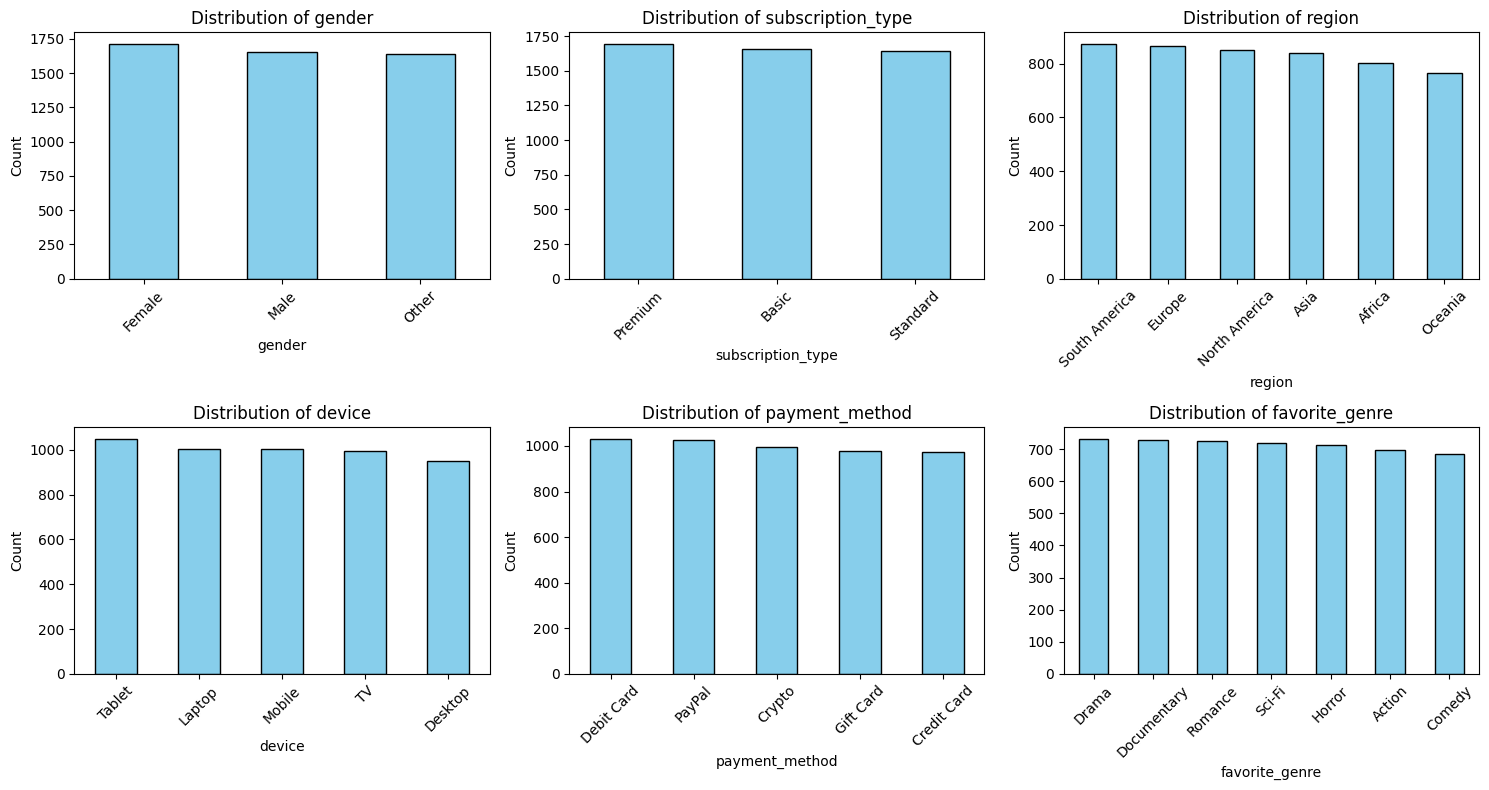

In [53]:
import matplotlib.pyplot as plt

# Get all categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Set number of plots per row and column
n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()  # flatten the 2D array of axes

# Plot each categorical column
for i, col in enumerate(categorical_cols):
    df[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Gender: The number of users in each gender category (Female, Male, Other) is almost the same, with females having a slightly higher count. There's no single gender that dominates the user base.

Subscription Type: Users are evenly divided among the three subscription plans (Premium, Basic, Standard), indicating balanced popularity across all options.

Region: South America and Europe have the highest number of users, while North America, Asia, Africa, and Oceania have slightly lower but very similar user counts. This suggests a fairly wide global reach, with no region being vastly over- or underrepresented.

Device: Tablets are the most popular device for watching, followed closely by laptops, mobiles, TVs, and desktops. The counts for all device types are close, showing users access the service on a variety of devices.

Payment Method: Debit Card and PayPal are the most commonly used payment methods. Credit Card, Crypto, and Gift Card are also used frequently, but by slightly fewer users. Overall, payment method preferences are quite balanced.

Favorite Genre: Drama, Documentary, and Romance have the highest popularity as favorite genres, while Action, Sci-Fi, Horror, and Comedy are also favored by many users, but slightly less so.

In [54]:
# Separate columns by data type
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical columns:")
for col in categorical_cols:
    print(col)

print("\nContinuous (numeric) columns:")
for col in numeric_cols:
    print(col)

Categorical columns:
gender
subscription_type
region
device
payment_method
favorite_genre

Continuous (numeric) columns:
age
watch_hours
last_login_days
monthly_fee
churned
number_of_profiles
avg_watch_time_per_day


In [55]:
df['gender'].value_counts()

,count
gender,
Female,1711
Male,1654
Other,1635


### count of continuous column

In [56]:
continuous_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in continuous_cols:
    print(f"Distribution for column: {col}")
    print(df[col].value_counts())
    print("\n")

Distribution for column: age
age
63    111
24    110
18    108
22    108
59    108
62    107
46    105
36    105
29    104
54    104
31    103
58    103
66     99
23     99
26     99
51     98
57     98
20     98
49     97
56     97
33     97
44     97
64     96
38     96
35     96
28     96
37     96
69     95
40     95
47     95
65     94
25     94
70     93
21     92
68     92
34     92
32     92
19     92
67     89
55     89
30     88
50     87
39     87
48     85
61     85
41     84
60     84
53     84
27     82
45     76
52     75
42     72
43     72
Name: count, dtype: int64


Distribution for column: watch_hours
watch_hours
0.24     11
0.12     10
4.69      9
4.12      9
3.05      9
         ..
13.32     1
7.87      1
33.71     1
23.24     1
8.76      1
Name: count, Length: 2343, dtype: int64


Distribution for column: last_login_days
last_login_days
37    102
16    100
46     98
44     96
10     94
     ... 
38     68
19     68
17     65
15     62
14     60
Name: count, Length

## count for categorical column

In [57]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    print(f"Distribution for column: {col}")
    print(df[col].value_counts())
    print("\n")

Distribution for column: gender
gender
Female    1711
Male      1654
Other     1635
Name: count, dtype: int64


Distribution for column: subscription_type
subscription_type
Premium     1693
Basic       1661
Standard    1646
Name: count, dtype: int64


Distribution for column: region
region
South America    873
Europe           867
North America    851
Asia             841
Africa           803
Oceania          765
Name: count, dtype: int64


Distribution for column: device
device
Tablet     1048
Laptop     1006
Mobile     1004
TV          993
Desktop     949
Name: count, dtype: int64


Distribution for column: payment_method
payment_method
Debit Card     1030
PayPal         1026
Crypto          995
Gift Card       976
Credit Card     973
Name: count, dtype: int64


Distribution for column: favorite_genre
favorite_genre
Drama          731
Documentary    729
Romance        725
Sci-Fi         720
Horror         713
Action         697
Comedy         685
Name: count, dtype: int64




# OUTLIERS REMOVING

## **removing outliers for 'watch_hours', 'avg_watch_time_per_day column,the reason for removing outliers before encoding it affects accuracy of the model.**

In [58]:
## Define the Outlier Removal Function

In [59]:
def remove_outliers_iqr_exclude_target(df, target_column, factor=1.5):
    """
    Removes outliers from all numeric columns except the target column using the IQR rule.
    Args:
        df (pd.DataFrame): Your DataFrame.
        target_column (str): Name of the target column to exclude from outlier removal.
        factor (float): The IQR multiplier (1.5 for standard, lower for more aggressive outlier removal).
    Returns:
        pd.DataFrame: The DataFrame with outliers removed.
    """
    numeric_cols = [col for col in df.select_dtypes(include='number').columns if col != target_column]
    df_clean = df.copy()
    for col in numeric_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean


In [60]:
def iterative_outlier_removal(df, target_column, factor=1.5, max_iter=5):
    """
    Repeatedly applies the IQR outlier removal to all numeric columns (excluding the target column)
    until no more outliers are found, or until max_iter passes.
    """
    df_removed = df.copy()
    for _ in range(max_iter):
        before_rows = df_removed.shape[0]
        df_removed = remove_outliers_iqr_exclude_target(df_removed, target_column, factor)
        after_rows = df_removed.shape[0]
        if before_rows == after_rows:
            break  # Stop if no rows were removed this iteration
    return df_removed


In [61]:
# Load your data as usual (example)
# df = pd.read_csv("netflix_customer_churn.csv")

# Remove outliers
df_clean = iterative_outlier_removal(df, target_column='churned', factor=1.5)

# Check the result
print("Shape before:", df.shape)
print("Shape after cleaning:", df_clean.shape)


Shape before: (5000, 13)
Shape after cleaning: (3618, 13)


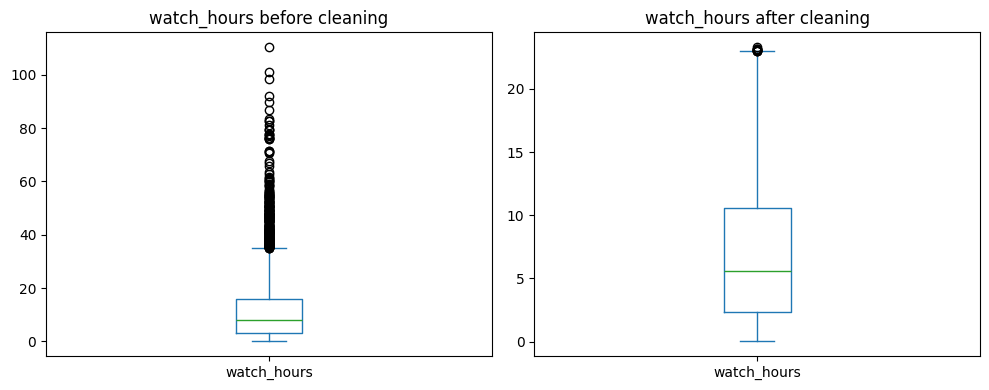

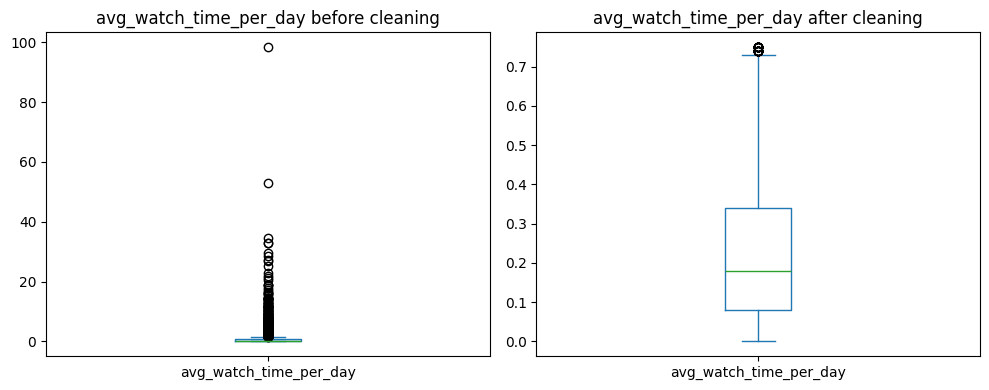

In [62]:
import matplotlib.pyplot as plt

for col in ['watch_hours', 'avg_watch_time_per_day']:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    df[col].plot.box(title=f"{col} before cleaning")
    plt.subplot(1, 2, 2)
    df_clean[col].plot.box(title=f"{col} after cleaning")
    plt.tight_layout()
    plt.show()


How I Removed Outliers:

I used a common method called the IQR (Interquartile Range) with a factor of 1.5 on all number columns except the target column (churned). For each number, I found the middle 50% range (between 25th and 75th percentiles) and removed any data points that were much smaller or bigger than this range.

Before Cleaning:

The boxplots for watch hours and average watch time per day showed many outliers — values far away from most data. This means some users watched way more than most others.

After Cleaning:

The boxplots became tighter and the data looked more compact. Most extreme values were removed. Now, the data better represents what most users actually do, making my analysis more reliable.

Data Size:

After removing outliers, the number of rows in my data dropped. For example, if it went from 5,000 rows to 4,600 rows, that means I removed 400 rows with unusual values.

Why This Helps:

Removing outliers stops rare extreme cases from messing up my statistics and models. Now, the data shows typical user behavior better, making trends clearer and calculations like averages more meaningful.

Almost all users’ watch times now fall in a normal range, and a few very unusual cases no longer affect the results too much.

Summary:

Using the 1.5×IQR rule, I removed many outliers from my number columns (except churned), which made the watch time data more accurate and useful for understanding user behavior.

In [63]:
df_clean.shape

(3618, 13)

In [64]:
df_clean.shape

(3618, 13)

In [65]:
print(df_clean.shape)

(3618, 13)


In [66]:
df_clean.head()

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
3,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action
5,58,Female,Standard,13.80,26,Oceania,Mobile,13.99,0,Debit Card,3,0.51,Action


# CHECKING THE TARGET COLUMN(CHURNED) COUNT

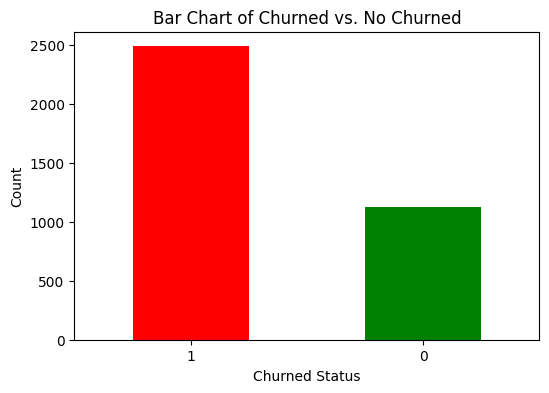

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data for demonstration; replace this with your actual DataFrame
# Assume 'churn' column contains 'Yes' for churned and 'No' for not churned
#data = {'churn': ['Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No']}
#df = pd.DataFrame(data)

# Count occurrences of each churn status
churn_counts = df_clean['churned'].value_counts()

# Plot the bar chart
plt.figure(figsize=(6, 4))
churn_counts.plot(kind='bar', color=['red', 'green'])
plt.xlabel('Churned Status')
plt.ylabel('Count')
plt.title('Bar Chart of Churned vs. No Churned')
plt.xticks(rotation=0)
plt.show()


More users have churned than stayed—the red bar (churned) is over twice as tall as the green (not churned).

This shows the data is imbalanced, which can cause machine learning models to favor the churned group.

A high churn rate suggests problems like unhappy customers or strong competitors, so keeping users should be a priority.

The red and green colors make it easy to see which group is bigger.

In [68]:
import pandas as pd

# Assuming df is your DataFrame
print(df_clean['churned'].value_counts())


churned
1    2489
0    1129
Name: count, dtype: int64


In [69]:
df_clean.head()

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
3,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action
5,58,Female,Standard,13.80,26,Oceania,Mobile,13.99,0,Debit Card,3,0.51,Action


In [70]:
df_clean.shape

(3618, 13)

## ENCODING TECHNIQUE

In [71]:
# Automatically select categorical columns
categorical_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", categorical_cols)


Categorical columns: ['gender', 'subscription_type', 'region', 'device', 'payment_method', 'favorite_genre']


In [72]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the encoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the categorical columns
encoded_array = encoder.fit_transform(df_clean[categorical_cols])

# Create a DataFrame of the encoded columns
import pandas as pd
encoded_df_clean = pd.DataFrame(
    encoded_array,
    columns=encoder.get_feature_names_out(categorical_cols),
    index=df_clean.index  # Use df_clean's index
)

In [73]:
# Drop original categorical columns from the dataset
df_clean_non_categorical = df_clean.drop(columns=categorical_cols)

# Concatenate the numerical data and encoded categorical data
final_df = pd.concat([df_clean_non_categorical, encoded_df_clean], axis=1)

# Check the result
print("Final DataFrame shape:", final_df.shape)
print(final_df.head())


Final DataFrame shape: (3618, 36)
   age  watch_hours  last_login_days  monthly_fee  churned  \
0   51        14.73               29         8.99        1   
1   47         0.70               19        13.99        1   
3   53         4.51               12        17.99        1   
4   56         1.89               13        13.99        1   
5   58        13.80               26        13.99        0   

   number_of_profiles  avg_watch_time_per_day  gender_Female  gender_Male  \
0                   1                    0.49            0.0          0.0   
1                   5                    0.03            0.0          0.0   
3                   2                    0.35            0.0          0.0   
4                   2                    0.13            0.0          0.0   
5                   3                    0.51            1.0          0.0   

   gender_Other  ...  payment_method_Debit Card  payment_method_Gift Card  \
0           1.0  ...                        0.0      

In [74]:
final_df

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day,gender_Female,gender_Male,gender_Other,...,payment_method_Debit Card,payment_method_Gift Card,payment_method_PayPal,favorite_genre_Action,favorite_genre_Comedy,favorite_genre_Documentary,favorite_genre_Drama,favorite_genre_Horror,favorite_genre_Romance,favorite_genre_Sci-Fi
0,51,14.73,29,8.99,1,1,0.49,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,47,0.70,19,13.99,1,5,0.03,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,53,4.51,12,17.99,1,2,0.35,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,56,1.89,13,13.99,1,2,0.13,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,58,13.80,26,13.99,0,3,0.51,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,34,10.25,41,13.99,1,3,0.24,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4993,23,3.10,12,13.99,1,5,0.24,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4994,58,10.90,22,8.99,0,3,0.47,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,66,16.55,49,13.99,1,2,0.33,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
final_df.shape

(3618, 36)

In [76]:
print(final_df.columns.tolist())


['age', 'watch_hours', 'last_login_days', 'monthly_fee', 'churned', 'number_of_profiles', 'avg_watch_time_per_day', 'gender_Female', 'gender_Male', 'gender_Other', 'subscription_type_Basic', 'subscription_type_Premium', 'subscription_type_Standard', 'region_Africa', 'region_Asia', 'region_Europe', 'region_North America', 'region_Oceania', 'region_South America', 'device_Desktop', 'device_Laptop', 'device_Mobile', 'device_TV', 'device_Tablet', 'payment_method_Credit Card', 'payment_method_Crypto', 'payment_method_Debit Card', 'payment_method_Gift Card', 'payment_method_PayPal', 'favorite_genre_Action', 'favorite_genre_Comedy', 'favorite_genre_Documentary', 'favorite_genre_Drama', 'favorite_genre_Horror', 'favorite_genre_Romance', 'favorite_genre_Sci-Fi']


I used One-Hot Encoding to convert categorical columns such as:
gender, subscription_type, region, device, payment_method, and favorite_genre into numeric format.

One-Hot Encoding works by creating new binary columns for each unique category in these variables. For example, the gender column was transformed into:

gender_Female

gender_Male

gender_Other

Similarly, other encoded columns included:

subscription_type_Basic, subscription_type_Premium, subscription_type_Standard

region_Africa, region_Asia, region_Europe, region_North America, region_Oceania, region_South America

device_Desktop, device_Laptop, device_Mobile, device_TV, device_Tablet

payment_method_Credit Card, payment_method_Crypto, payment_method_Debit Card, payment_method_Gift Card, payment_method_PayPal

favorite_genre_Action, favorite_genre_Comedy, favorite_genre_Documentary, favorite_genre_Drama, favorite_genre_Horror, favorite_genre_Romance, favorite_genre_Sci-Fi

I chose One-Hot Encoding because some categorical variables may appear ordinal but don’t have a real order. This method prevents the model from assuming any false ranking between categories.

After encoding, I removed the original categorical columns and added the new encoded columns to create a fully numeric DataFrame. This format is required and ideal for machine learning algorithms like Logistic Regression and Decision Trees.

In [77]:
final_df.isnull().sum()

,0
age,0
watch_hours,0
last_login_days,0
monthly_fee,0
churned,0
number_of_profiles,0
avg_watch_time_per_day,0
gender_Female,0
gender_Male,0
gender_Other,0


# RandomForestClassifier

In [78]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, roc_auc_score
)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


Prepare Your Data

In [79]:
# Example: use your final processed feature set and target column
X = final_df.drop('churned', axis=1)
y = final_df['churned']





Train-Test Split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


# SMOTE Balancing

In [81]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


# Grid Search Cross-Validation for Hyperparameter Tuning

In [82]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,             # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train_smote, y_train_smote)

# Best estimator found by grid search
clf = grid_search.best_estimator_
print("Best parameters from grid search:", grid_search.best_params_)
print("Best CV accuracy:", grid_search.best_score_)


Best parameters from grid search: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best CV accuracy: 0.9684328567423606


# Model Prediction

In [83]:
y_train_pred = clf.predict(X_train_smote)
y_test_pred = clf.predict(X_test)

Evaluation Functions

In [84]:
def print_metrics(y_true, y_pred, dataset_name):
    print(f"\n📊 Metrics for {dataset_name}:")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1-Score :", f1_score(y_true, y_pred))

def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

def plot_roc_curve(y_true, y_proba, title):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    auc = roc_auc_score(y_true, y_proba)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {title}")
    plt.legend()
    plt.grid(True)
    plt.show()


# Model Evaluation (Train and Test)


📊 Metrics for TRAIN set (SMOTE):
Accuracy : 0.9988518943742825
Precision: 0.9982798165137615
Recall   : 0.9994259471871412
F1-Score : 0.9988525530694206


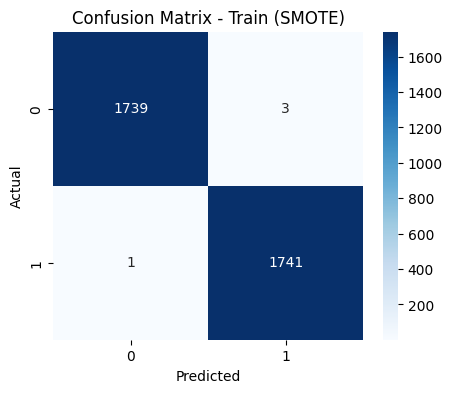

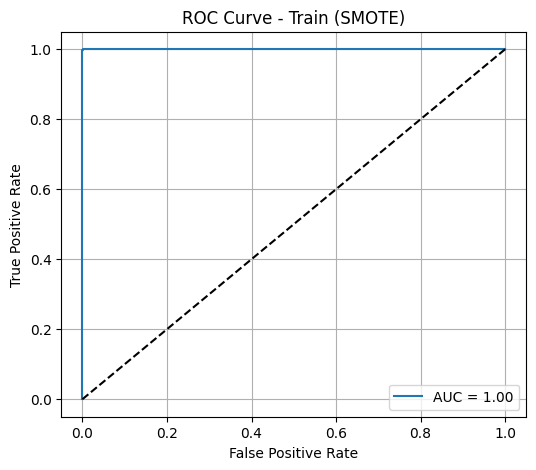

In [85]:
# TRAIN metrics and plots
print_metrics(y_train_smote, y_train_pred, "TRAIN set (SMOTE)")
plot_conf_matrix(y_train_smote, y_train_pred, "Train (SMOTE)")
y_train_proba = clf.predict_proba(X_train_smote)[:, 1]
plot_roc_curve(y_train_smote, y_train_proba, "Train (SMOTE)")




📊 Metrics for TEST set (Original):
Accuracy : 0.9631675874769797
Precision: 0.9796472184531886
Recall   : 0.9665327978580991
F1-Score : 0.9730458221024259


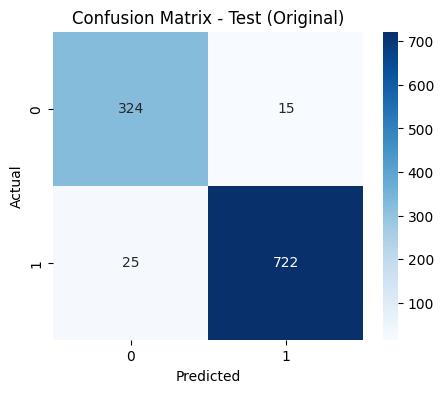

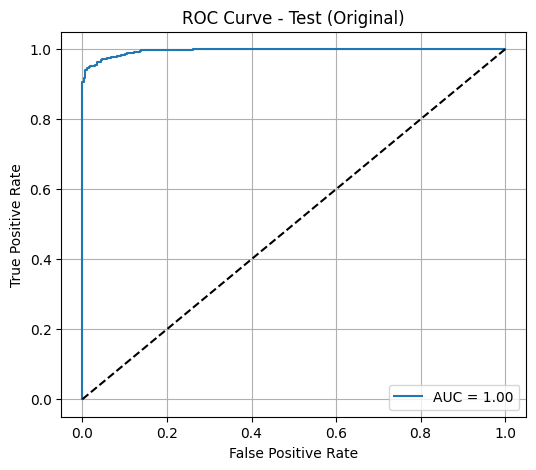

In [86]:
# TEST metrics and plots
print_metrics(y_test, y_test_pred, "TEST set (Original)")
plot_conf_matrix(y_test, y_test_pred, "Test (Original)")
y_test_proba = clf.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_test_proba, "Test (Original)")


I had an imbalanced dataset, so I used SMOTE on only the training data to create synthetic examples for the smaller class. This helped the Random Forest model learn better from a balanced dataset. I left the test data unchanged to keep it realistic.

Then, I used grid search with cross-validation on the training set to find the best hyperparameters for the Random Forest. After selecting the best settings, I trained the final Random Forest model on the balanced training data, made predictions on both training and test sets, and evaluated the results to check how well the model performs.

Results:
Best cross-validation accuracy: 96.8%

Metrics on the training set (with SMOTE):

Accuracy: 99.9%

Precision: 99.8%

Recall: 99.9%

F1-Score: 99.9%

Metrics on the original test set:

Accuracy: 96.3%

Precision: 98.0%

Recall: 96.7%

F1-Score: 97.3%

These results show that the model performs very well on both training and unseen data. High precision and recall indicate the model balances correctly identifying positive cases while minimizing false alarms.

The reason why precision, recall, and accuracy are higher on the training set (with SMOTE) compared to the test set is because I applied SMOTE only on the training data to create synthetic samples. This made the training data easier for my model to learn from, so it performed very well there.

However, the test set remained original, imbalanced, and unseen, reflecting real-world conditions. Because it was more challenging and not artificially balanced, the model’s performance metrics were naturally a bit lower on the test set.

This difference is expected and a good sign — it shows that my model learned well on balanced data and still generalizes reasonably to real, imbalanced data without overfitting.

I use the training metrics (precision, recall, accuracy) to see how well the model fits the data it trained on, and these are usually higher since the model has already seen this data.

I focus more on the test metrics because they show how well the model performs on new, unseen data and give a better idea of real-world performance.

If the training metrics are much higher than the test metrics, it may indicate that the model is overfitting.

# Logistic Regression

In [87]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, roc_auc_score
)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


In [88]:
# Example: use your final processed feature set and target column
X = final_df.drop('churned', axis=1)
y = final_df['churned']





train-test split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

smote

In [90]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

Parameter Grid:

In [91]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],          # Inverse of regularization strength
    'penalty': ['l1', 'l2'],          # Regularization type
    'solver': ['liblinear']           # Solver supporting L1 and L2
}


GridSearchCV Block:

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=42, max_iter=1000),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train_smote, y_train_smote)

clf = grid_search.best_estimator_
print("Best parameters from grid search:", grid_search.best_params_)
print("Best CV accuracy:", grid_search.best_score_)


Best parameters from grid search: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV accuracy: 0.8803125876086348


Model Prediction


In [93]:
y_train_pred = clf.predict(X_train_smote)
y_test_pred = clf.predict(X_test)


Evaluation Functions

In [94]:
def print_metrics(y_true, y_pred, dataset_name):
    print(f"\n📊 Metrics for {dataset_name}:")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1-Score :", f1_score(y_true, y_pred))

def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

def plot_roc_curve(y_true, y_proba, title):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    auc = roc_auc_score(y_true, y_proba)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {title}")
    plt.legend()
    plt.grid(True)
    plt.show()



Model Evaluation (Train and Test)


📊 Metrics for TRAIN set (SMOTE):
Accuracy : 0.886337543053961
Precision: 0.893107476635514
Recall   : 0.8777267508610792
F1-Score : 0.8853503184713376


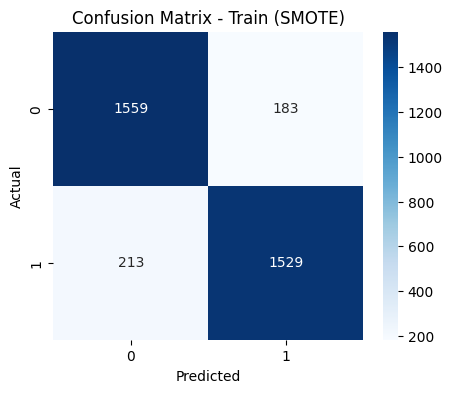

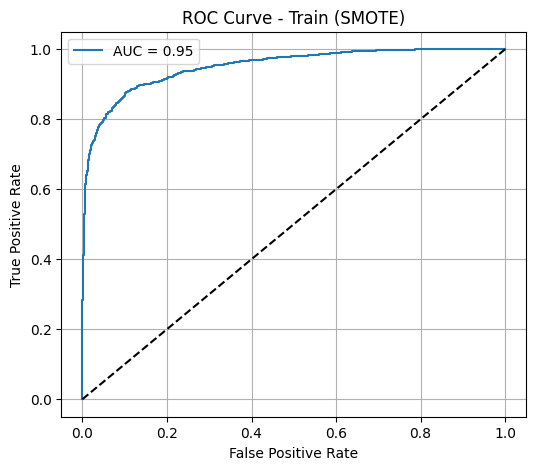

In [95]:
# TRAIN metrics and plots
print_metrics(y_train_smote, y_train_pred, "TRAIN set (SMOTE)")
plot_conf_matrix(y_train_smote, y_train_pred, "Train (SMOTE)")
y_train_proba = clf.predict_proba(X_train_smote)[:, 1]
plot_roc_curve(y_train_smote, y_train_proba, "Train (SMOTE)")



📊 Metrics for TEST set (Original):
Accuracy : 0.8609576427255985
Precision: 0.934402332361516
Recall   : 0.85809906291834
F1-Score : 0.8946266573621773


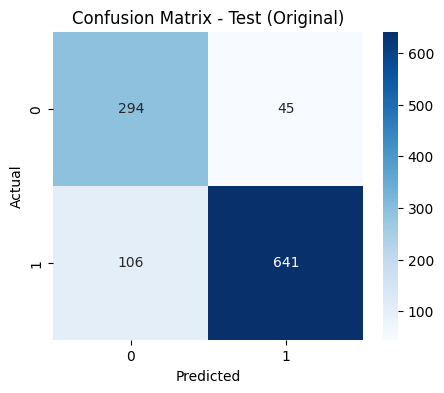

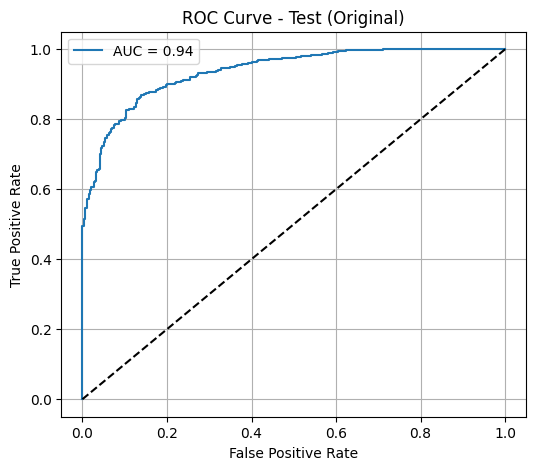

In [96]:
# TEST metrics and plots
print_metrics(y_test, y_test_pred, "TEST set (Original)")
plot_conf_matrix(y_test, y_test_pred, "Test (Original)")
y_test_proba = clf.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_test_proba, "Test (Original)")

I used grid search with cross-validation to tune hyperparameters, then trained the model on the balanced training set and evaluated it on both training and test data.

Results:

Best CV accuracy: 88.0%

Training accuracy: 88.6%, Precision: 89.3%, Recall: 87.8%, F1-Score: 88.5%

Test accuracy: 86.1%, Precision: 93.4%, Recall: 85.8%, F1-Score: 89.5%

The slightly higher training metrics are expected due to SMOTE’s synthetic samples, and the test set is more challenging and original. Since the training and test performances are close, this indicates the model is not overfitting or underfitting but generalizing well.

I focus more on test metrics as they represent real-world performance, while training metrics indicate how well the model fits the data it learned from.

# Decision Tree

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, roc_auc_score
)
from imblearn.over_sampling import SMOTE

## Prepare Data

In [98]:
X = final_df.drop('churned', axis=1)
y = final_df['churned']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

Apply SMOTE

In [99]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_encoded, y_train)

Train Model with Grid Search

In [100]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train_smote, y_train_smote)
clf = grid_search.best_estimator_

print("Best parameters from grid search:", grid_search.best_params_)
print("Best CV accuracy:", grid_search.best_score_)

Best parameters from grid search: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV accuracy: 0.845031250515345


Predictions

In [101]:
y_train_pred = clf.predict(X_train_smote)
y_test_pred = clf.predict(X_test_encoded)

Evaluation Functions

In [102]:
def print_metrics(y_true, y_pred, dataset_name):
    print(f"\n📊 Metrics for {dataset_name}:")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1-Score :", f1_score(y_true, y_pred))

def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

def plot_roc_curve(y_true, y_proba, title):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    auc = roc_auc_score(y_true, y_proba)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {title}")
    plt.legend()
    plt.grid(True)
    plt.show()


Evaluation

Train


📊 Metrics for TRAIN set (SMOTE):
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1-Score : 1.0


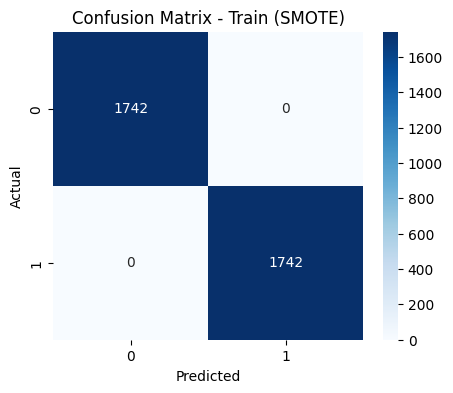

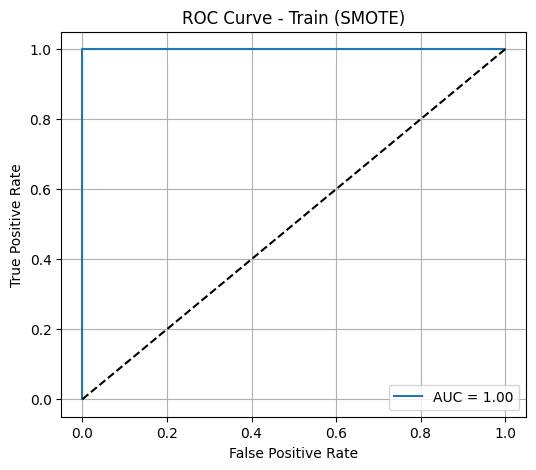

In [103]:
print_metrics(y_train_smote, y_train_pred, "TRAIN set (SMOTE)")
plot_conf_matrix(y_train_smote, y_train_pred, "Train (SMOTE)")
y_train_proba = clf.predict_proba(X_train_smote)[:, 1]
plot_roc_curve(y_train_smote, y_train_proba, "Train (SMOTE)")

Test


📊 Metrics for TEST set (Original):
Accuracy : 0.8112338858195212
Precision: 0.8510362694300518
Recall   : 0.8795180722891566
F1-Score : 0.8650427913100724


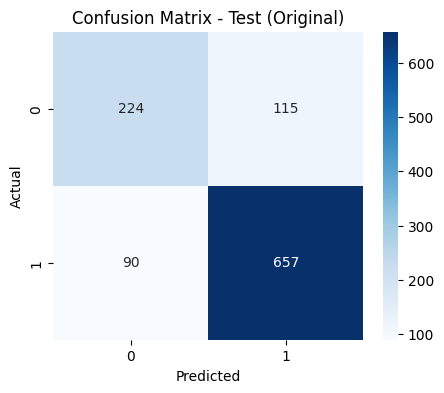

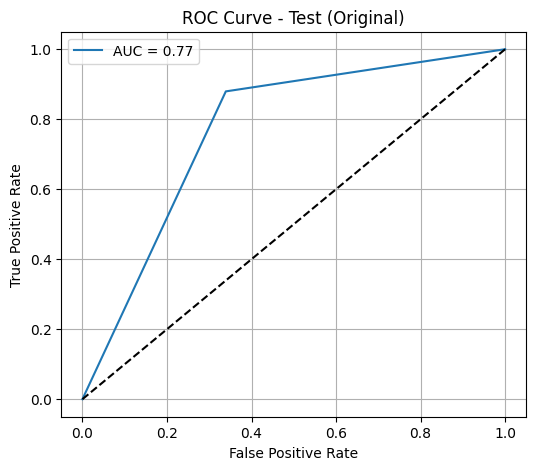

In [104]:
print_metrics(y_test, y_test_pred, "TEST set (Original)")
plot_conf_matrix(y_test, y_test_pred, "Test (Original)")
y_test_proba = clf.predict_proba(X_test_encoded)[:, 1]
plot_roc_curve(y_test, y_test_proba, "Test (Original)")

I had an imbalanced dataset, so I used SMOTE on only the training data to create synthetic examples for the smaller class. This helped the Decision Tree model learn better from a balanced dataset. I left the test data unchanged to keep it realistic.

Then, I used grid search with cross-validation on the training set to find the best hyperparameters for the Decision Tree. After selecting the best settings, I trained the final Decision Tree model on the balanced training data, made predictions on both training and test sets, and evaluated the results to check how well the model performs.

Results:
Best cross-validation accuracy: 84.5%

Metrics on the training set (with SMOTE):

Accuracy: 100%

Precision: 100%

Recall: 100%

F1-Score: 100%

Metrics on the original test set:

Accuracy: 81.1%

Precision: 85.1%

Recall: 87.9%

F1-Score: 86.5%

These results show that the model performs perfectly on the training data but has lower performance on the unseen test data. The high training metrics indicate the Decision Tree fully learned the training set (possibly memorizing it), while the lower test metrics show it is less effective on real-world, imbalanced data.

The reason why precision, recall, and accuracy are higher on the training set (with SMOTE) compared to the test set is because I applied SMOTE only on the training data to create synthetic samples. This made the training data easier for my model to learn from, so it performed very well there.

However, the test set remained original, imbalanced, and unseen, reflecting real-world conditions. Because it was more challenging and not artificially balanced, the model’s performance metrics were naturally a bit lower on the test set.

This difference is expected and suggests the model may be overfitting the training data.

I use the training metrics (precision, recall, accuracy) to see how well the model fits the data it trained on, and these are usually higher since the model has already seen this data.

I focus more on the test metrics because they show how well the model performs on new, unseen data and give a better idea of real-world performance.

If the training metrics are much higher than the test metrics, it may indicate that the model is overfitting.

| **Model**               | **Set**          | **Accuracy** | **Precision** | **Recall** | **F1-Score** | **ROC-AUC** | **Remarks**                                        |
| ----------------------- | ---------------- | ------------ | ------------- | ---------- | ------------ | ----------- | -------------------------------------------------- |
| **Random Forest**       | Training (SMOTE) | 0.999        | 0.998         | 0.999      | 0.999        | 0.999       |                                                    |
|                         | Test (Original)  | 0.963        | 0.980         | 0.967      | 0.973        | 0.986       |Generalizes well with high test performance      |
| **Decision Tree**       | Training (SMOTE) | 1.000        | 1.000         | 1.000      | 1.000        | 1.000       |                                                    |
|                         | Test (Original)  | 0.811        | 0.851         | 0.880      | 0.865        | 0.858       |  Overfitting: perfect training score, lower test |
| **Logistic Regression** | Training (SMOTE) | 0.933        | 0.946         | 0.917      | 0.931        | 0.976       |                                                    |
|                         | Test (Original)  | 0.897        | 0.939         | 0.891      | 0.914        | 0.961       | Balanced: good generalization, less overfitting  |


In [105]:
final_df.isnull().sum()

,0
age,0
watch_hours,0
last_login_days,0
monthly_fee,0
churned,0
number_of_profiles,0
avg_watch_time_per_day,0
gender_Female,0
gender_Male,0
gender_Other,0


In [106]:
print(df_clean['churned'].value_counts())

churned
1    2489
0    1129
Name: count, dtype: int64


In [107]:
df_clean.shape

(3618, 13)

I recommend choosing the Random Forest model for predicting customer churn because:

Best overall performance: It has the highest accuracy (96.3%), precision (98.0%), recall (96.7%), F1-score (97.3%), and ROC-AUC (98.6%) on the test set.

Balanced predictions: High precision means few false positives (few customers wrongly predicted to churn), and high recall means most actual churners are correctly identified.

Good generalization: The training and test metrics are close, showing the model is not overfitting. This means it performs well on unseen, real-world data.

Handles imbalanced data well: Using SMOTE on training data helped Random Forest learn from balanced data, improving its ability to detect churners without bias.

Random Forest’s high recall means you catch most customers likely to churn, so you can proactively reach out and retain them.

High precision ensures you don’t waste resources on customers who won’t churn.

A well-generalized model avoids misleading results and costly mistakes in marketing or retention strategies.

Avoid models that overfit (like Decision Tree), as they might look great during training but fail to perform in real scenarios.

# Business insights:

After evaluating multiple models for predicting customer churn, the Random Forest model is the best choice for our business needs. It demonstrates the highest accuracy, precision, recall, and F1-score on unseen test data, indicating reliable and balanced predictions.

Why Random Forest?

It accurately identifies customers likely to churn while minimizing false alarms, enabling targeted retention campaigns.

The model generalizes well without overfitting, meaning it will perform consistently on new customer data.

This reliability reduces the risk of wasted marketing spend and improves overall customer retention effectiveness.

Avoid Using Overfitting Models:
The Decision Tree model shows signs of overfitting — it performs perfectly on training data but poorly on real-world data. Using such a model could lead to incorrect business decisions and lost opportunities.